In [1]:
#!/usr/bin/env python3

This script plots data over an spatial area. 

In [2]:
import os
import sys
from sys import exit as error
from time import process_time
from datetime import datetime
import warnings

import numpy
import matplotlib
import matplotlib.pyplot
import matplotlib.ticker
import matplotlib.axis
import mpl_toolkits.axes_grid1

import scipy.interpolate
import scipy.spatial
import shapely

AEMPYX_ROOT = os.environ["AEMPYX_ROOT"]
mypath = [AEMPYX_ROOT+"/aempy/modules/", AEMPYX_ROOT+"/aempy/scripts/"]
for pth in mypath:
    if pth not in sys.path:
        sys.path.insert(0,pth)

from version import versionstrg
import util
import aesys
import viz
import inverse

In [3]:
OutInfo = True
cm = 1/2.54
AEMPYX_DATA = os.environ["AEMPYX_DATA"]

In [4]:
version, _ = versionstrg()
script = "Tutorial1_VIZ_data_area.py"
# script = __file__  # this only works in python, not jupyter notebook
titstrng = util.print_title(version=version, fname=script, out=False)
print(titstrng+"\n\n")
Header = titstrng

AEMpyX Version 0.99.99
Date 05/14/2024, 10:21:38
Tutorial1_VIZ_data_area.py, modified 05/14/2024, 10:20:37
Tutorial1_VIZ_data_area.py




The following cell gives values to AEM-system related settings. 

Data transformation is activated by the variable _DataTrans_. Currently 
three possible options are allowed: _DataTrans = 0_: No transformation, 
i.e., the raw data are used. _DataTrans = 1_: The natural log of data 
is taken, only allowed for strictly positive values. _DataTrans = 2_: 
If data scale logarithmically, an _asinh_ transformation (introduced by
Scholl, 2000) is applied. It allows negatives, which may occur in TDEM, 
when IP effects are present.
       
A general additive/multiplicative error model is applied on the raw data
before transformation, and errors are also transformed.

In [5]:
# AEM_system = "genesis"
AEM_system = "aem05"
if "aem05" in AEM_system.lower():
    _, NN, _, _, Misc, = aesys.get_system_params(System=AEM_system)
    nL = NN[0]
    ParaTrans = 1
    DataTrans = 0
    DatErr_add =  50.
    DatErr_mult = 0.03
    data_active = numpy.ones(NN[2], dtype="int8")
    
    CompDict = Misc[3]
    CompLabl = list(CompDict.keys())
    print(CompLabl)


AEM system is aem05
Forward model call: core1d.aemfwd1d_aem05(nlyr, m, alt)
Data:[17, 6, 8, 3]
['P1', 'Q1', 'P2', 'Q2', 'P3', 'Q3', 'P4', 'Q4', 'PLM', 'ALT']


In [6]:
if "genes" in AEM_system.lower():
    _, NN, _, _, Misc, = aesys.get_system_params(System=AEM_system)
    nL = NN[0]
    ParaTrans = 1
    DataTrans = 2
    DatErr_add = 100.
    DatErr_mult = 0.01
    data_active = numpy.ones(NN[2], dtype="int8")
    data_active[0:11]=0  # only vertical component
    # data_active[10:11]=0  # Vertical + "good" hoizontals"
    CompDict =Misc[2]
    CompLabl = list(CompDict.keys())

In [7]:

InFileFmt = ".npz"

FileList = "search"  
SearchStrng = "*FL*.npz"# "search", "read"

AEMPYX_DATA = AEMPYX_ROOT+"/data/"
InDatDir = AEMPYX_DATA+"/aem05_limerick/raw/"
PlotDir = AEMPYX_DATA+"/aem05_limerick/raw/plots/"
PlotName = "Limerick_shale_raw"

print("Data read from dir: %s " % InDatDir)
print("Plots written to dir: %s " % PlotDir)
print("Plot filname: %s " % PlotName)

# FileList = "read"
ListName = ""

Data read from dir: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/ 
Plots written to dir: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/ 
Plot filname: Limerick_shale_raw 


In [8]:
if "set" in FileList.lower():
    dat_files = []

In [9]:
if "read" in FileList.lower():
    print("File names read from : "+ListName)
    how = ["read", ListName, InDatDir]
    dat_files = util.get_data_list(how=how,
                              out= True, sort=True)

    dat_files = numpy.loadtxt("A9-7.dat", dtype=str)

In [10]:
if "search" in FileList.lower():
    print("Searchstring is : "+SearchStrng)
    how = ["search", SearchStrng, InDatDir]
    dat_files = util.get_data_list(how=how,
                              out= True, sort=True)

Searchstring is : *FL*.npz
Data files read from dir:  /home/vrath/AEMpyX_public//data//aem05_limerick/raw/
Search string: *FL*.npz 
76 data files found:
['A5_rect_shale_FL5001-0.npz', 'A5_rect_shale_FL5002-0.npz', 'A5_rect_shale_FL5003-0.npz', 'A5_rect_shale_FL5004-0.npz', 'A5_rect_shale_FL5005-0.npz', 'A5_rect_shale_FL5006-0.npz', 'A5_rect_shale_FL5007-0.npz', 'A5_rect_shale_FL5008-0.npz', 'A5_rect_shale_FL5009-0.npz', 'A5_rect_shale_FL5010-0.npz', 'A5_rect_shale_FL5011-01.npz', 'A5_rect_shale_FL5012-0.npz', 'A5_rect_shale_FL5013-0.npz', 'A5_rect_shale_FL5014-0.npz', 'A5_rect_shale_FL5015-0.npz', 'A5_rect_shale_FL5016-0.npz', 'A5_rect_shale_FL5017-0.npz', 'A5_rect_shale_FL5018-0.npz', 'A5_rect_shale_FL5019-0.npz', 'A5_rect_shale_FL5020-0.npz', 'A5_rect_shale_FL5021-0.npz', 'A5_rect_shale_FL5022-0.npz', 'A5_rect_shale_FL5023-0.npz', 'A5_rect_shale_FL5024-0.npz', 'A5_rect_shale_FL5025-0.npz', 'A5_rect_shale_FL5026-0.npz', 'A5_rect_shale_FL5027-0.npz', 'A5_rect_shale_FL5028-0.npz', 'A5_r

In [11]:
ns = numpy.size(dat_files)
if ns ==0:
    error("No files set!. Exit.")

In [12]:
PlotFmt = [".pdf", ".png"] #".png", ".pdf",]

In [13]:
PDFCatalog = True
PDFCName = "MUN_3s_Catalog_Images.pdf"
if ".pdf" in PlotFmt:
    pass
else:
    error(" No pdfs generated. No catalog possible!")
    PDFCatalog = False

In [14]:
if "set" in FileList.lower():
    print("Data files read from dir:  %s" % InDatDir)-150
    dat_files = []

else:
    # how = ["search", SearchStrng, InDatDir]
    # how = ["read", FileList, InDatDir]
    dat_files = util.get_data_list(how=["search", SearchStrng, InDatDir],
                              out= True, fullpath=True, sort=True)
    ns = numpy.size(dat_files)

MergeData = True
DataMergeFile = InDatDir+PlotName+"_merged.npz"

Data files read from dir:  /home/vrath/AEMpyX_public//data//aem05_limerick/raw/
Search string: *FL*.npz 
76 data files found:
['/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5001-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5002-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5003-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5004-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5005-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5006-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5007-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5008-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5009-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5010-0.npz', '/home/vrath/AEMpyX_public//data//aem05_limerick/raw/

In [15]:
ns = numpy.size(dat_files)
if ns ==0:
    error("No files set!. Exit.")

In [16]:
ImageType = "image"
# ImageType = "contour"
# ImageType = "scatter"

In [17]:
XYUnits = "(km)"
XYFact = 0.001

In [18]:
"""
Kernel functions for RBF:
    The radial basis function, based on the radius, r,
    given by the norm (default is Euclidean distance); the default is ‘multiquadric’:
        ‘linear’ : -r
        ‘thin_plate_spline’ : r**2 * log(r)
        ‘cubic’ : r**3
        ‘quintic’ : -r**5

If a callable, then it must take 2 arguments (self, r). The epsilon parameter
will be available as self.epsilon. Other keyword arguments passed
in will be available as well.


Methods for griddata:
        'nearest'       data point closest to the point of interpolation
        'linear'        tessellate the input point set to N-D simplices
                        and interpolate linearly on each simplex
        'cubic'         return the value determined from a piecewise cubic,
                        continuously differentiable (C1), and approximately
                        curvature-minimizing polynomial surface.
"""

"\nKernel functions for RBF:\n    The radial basis function, based on the radius, r,\n    given by the norm (default is Euclidean distance); the default is ‘multiquadric’:\n        ‘linear’ : -r\n        ‘thin_plate_spline’ : r**2 * log(r)\n        ‘cubic’ : r**3\n        ‘quintic’ : -r**5\n\nIf a callable, then it must take 2 arguments (self, r). The epsilon parameter\nwill be available as self.epsilon. Other keyword arguments passed\nin will be available as well.\n\n\nMethods for griddata:\n        'nearest'       data point closest to the point of interpolation\n        'linear'        tessellate the input point set to N-D simplices\n                        and interpolate linearly on each simplex\n        'cubic'         return the value determined from a piecewise cubic,\n                        continuously differentiable (C1), and approximately\n                        curvature-minimizing polynomial surface.\n"

In [19]:
if ("image" in ImageType.lower()) or ("contour"in ImageType.lower()):
    step = 1

    InterpMethod = ["griddata","linear"]
    # InterpMethod = ["griddata", "cubic"]
    # InterpMethod = ["rbf", "linear", 0.0]
    # InterpMethod = ["rbf", "thin_plate_spline", 0.0]
    # InterpMethod = ["rbf", "cubic", 0.01]

    # InterpMethod = ["krig", "linear", 0.5, 340.]
    
    S = 500.
    numIndexes = [121, 141]
    smooth = 0.
    Levels = []
    MaskNeg = False
    MaskPoly = False
    MaskDist = True

    if MaskDist:
        DistMask = 100.*XYFact

    if MaskPoly:
        PolyDir = AEMPYX_DATA+"/Blocks/polygons/"
        PolyFiles = [PolyDir+"A5_2019_utm.npz"]
        Polygon= numpy.load(PolyFiles[0], allow_pickle=True)["Poly"][0]

In [20]:
if ("scatter" in ImageType.lower()):
    Decim=25
    step = min(1,abs(Decim))
    Markersize = 5
    MaskNeg = True
    Pixelsize = False
    if Pixelsize:
        step=10
        sfac = 10.

In [21]:
# CompList=[
#     ["Z3", []], #[0., 2000., 100.]],
#     ["Z6", []],#[0., 2000., 100.]],
#     ["Z9", []], #[0., 2000., 100.]],
#     ["H3", []], #[0., 2000., 100.]],
#     ["H6", []],#[0., 2000., 100.]],
#     ["H9", []], #[0., 2000., 100.]],
#     ["ALT", [80., 160., 20.], 240.]     # ALTthresh = 70.
          # ]

In [22]:
CompList=[
    ["P1", [-1500., 4000., 200.]],
    ["Q1", [-1500., 4000., 200.]],
    ["P2", [-1500., 4000., 200.]],
    ["Q2", [-1500., 4000., 200.]],
    ["P3", [-1500., 4000., 200.]],
    ["Q3", [-1500., 4000., 200.]],
    ["P4", [-1500., 4000., 200.]],
    ["Q4", [-1500., 4000., 200.]],
    ["PLM", [], 3],      # PLMthresh = 0.25
    ["ALT", [40., 120., 20.], 125.]     # ALTthresh = 70.
]


In [23]:
xformatter = matplotlib.ticker.FormatStrFormatter("%.2f")
yformatter = matplotlib.ticker.FormatStrFormatter("%.2f")
"""
Determine graphical parameter.
=> print(matplotlib.pyplot.style.available)
"""
FilesOnly = False
matplotlib.pyplot.style.use("seaborn-v0_8-paper")
matplotlib.rcParams["figure.dpi"] = 400
matplotlib.rcParams["text.usetex"] = False
matplotlib.rcParams["font.family"] = "sans-serif"
matplotlib.rcParams["axes.linewidth"] = 0.5
matplotlib.rcParams["savefig.facecolor"] = "none"
matplotlib.rcParams["savefig.bbox"]= "tight"

In [24]:
Fontsize = 7
Labelsize = Fontsize
Titlesize = 8
Fontsizes = [Fontsize, Labelsize, Titlesize]

In [25]:
Linewidths= [0.5]
FigWidth = 16.

In [26]:
"""
Determine colormap.
=> https://matplotlib.org/stable/gallery/color/colormap_reference.html
"""

'\nDetermine colormap.\n=> https://matplotlib.org/stable/gallery/color/colormap_reference.html\n'

In [27]:
Cmap ="viridis"
Cmap = "hsv"
# Cmap ="magma"
Cmap = "jet_r"
# Cmap = "seismic"
# Cmap = "Spectral"
cmp = matplotlib.colormaps[Cmap]

In [28]:
if FilesOnly:
    matplotlib.use("cairo")

In [29]:
if not os.path.isdir(PlotDir):
    print("File: %s does not exist, but will be created" % PlotDir)
    os.mkdir(PlotDir)

In [30]:
if MergeData:
    Data = util.merge_data_sets(infile_list=dat_files,
                                outfile_name=DataMergeFile,
                                aem_system="aem05", out= True)
    dat_files = [DataMergeFile]


AEM system is aem05
Forward model call: core1d.aemfwd1d_aem05(nlyr, m, alt)
Data:[17, 6, 8, 3]

Data read from: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5001-0.npz
['Data', 'Header', 'System']

Data read from: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5002-0.npz
['Data', 'Header', 'System']

Data read from: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5003-0.npz
['Data', 'Header', 'System']

Data read from: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5004-0.npz
['Data', 'Header', 'System']

Data read from: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5005-0.npz
['Data', 'Header', 'System']

Data read from: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5006-0.npz
['Data', 'Header', 'System']

Data read from: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/A5_rect_shale_FL5007-0.npz
['Data', 'Header', 'System']

Data read from: /home/vrath/


Data read from: /home/vrath/AEMpyX_public//data//aem05_limerick/raw/Limerick_shale_raw_merged.npz
['Data', 'Header', 'System']
Interpolation mesh, dx = 100.0 m, dy =93.0 m
Plotting component P1 - 912 Hz: 0/griddata/linear
Data, read   min=-1362.0   max=3976.0
Data, interpolated   min=-1102.5719731158777   max=3955.2259510089884
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_P1_griddata_linear.pdf


/tmp/ipykernel_61459/2689232001.py:230: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = matplotlib.pyplot.colorbar(im, cax=cax, extend="both")


Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_P1_griddata_linear.png


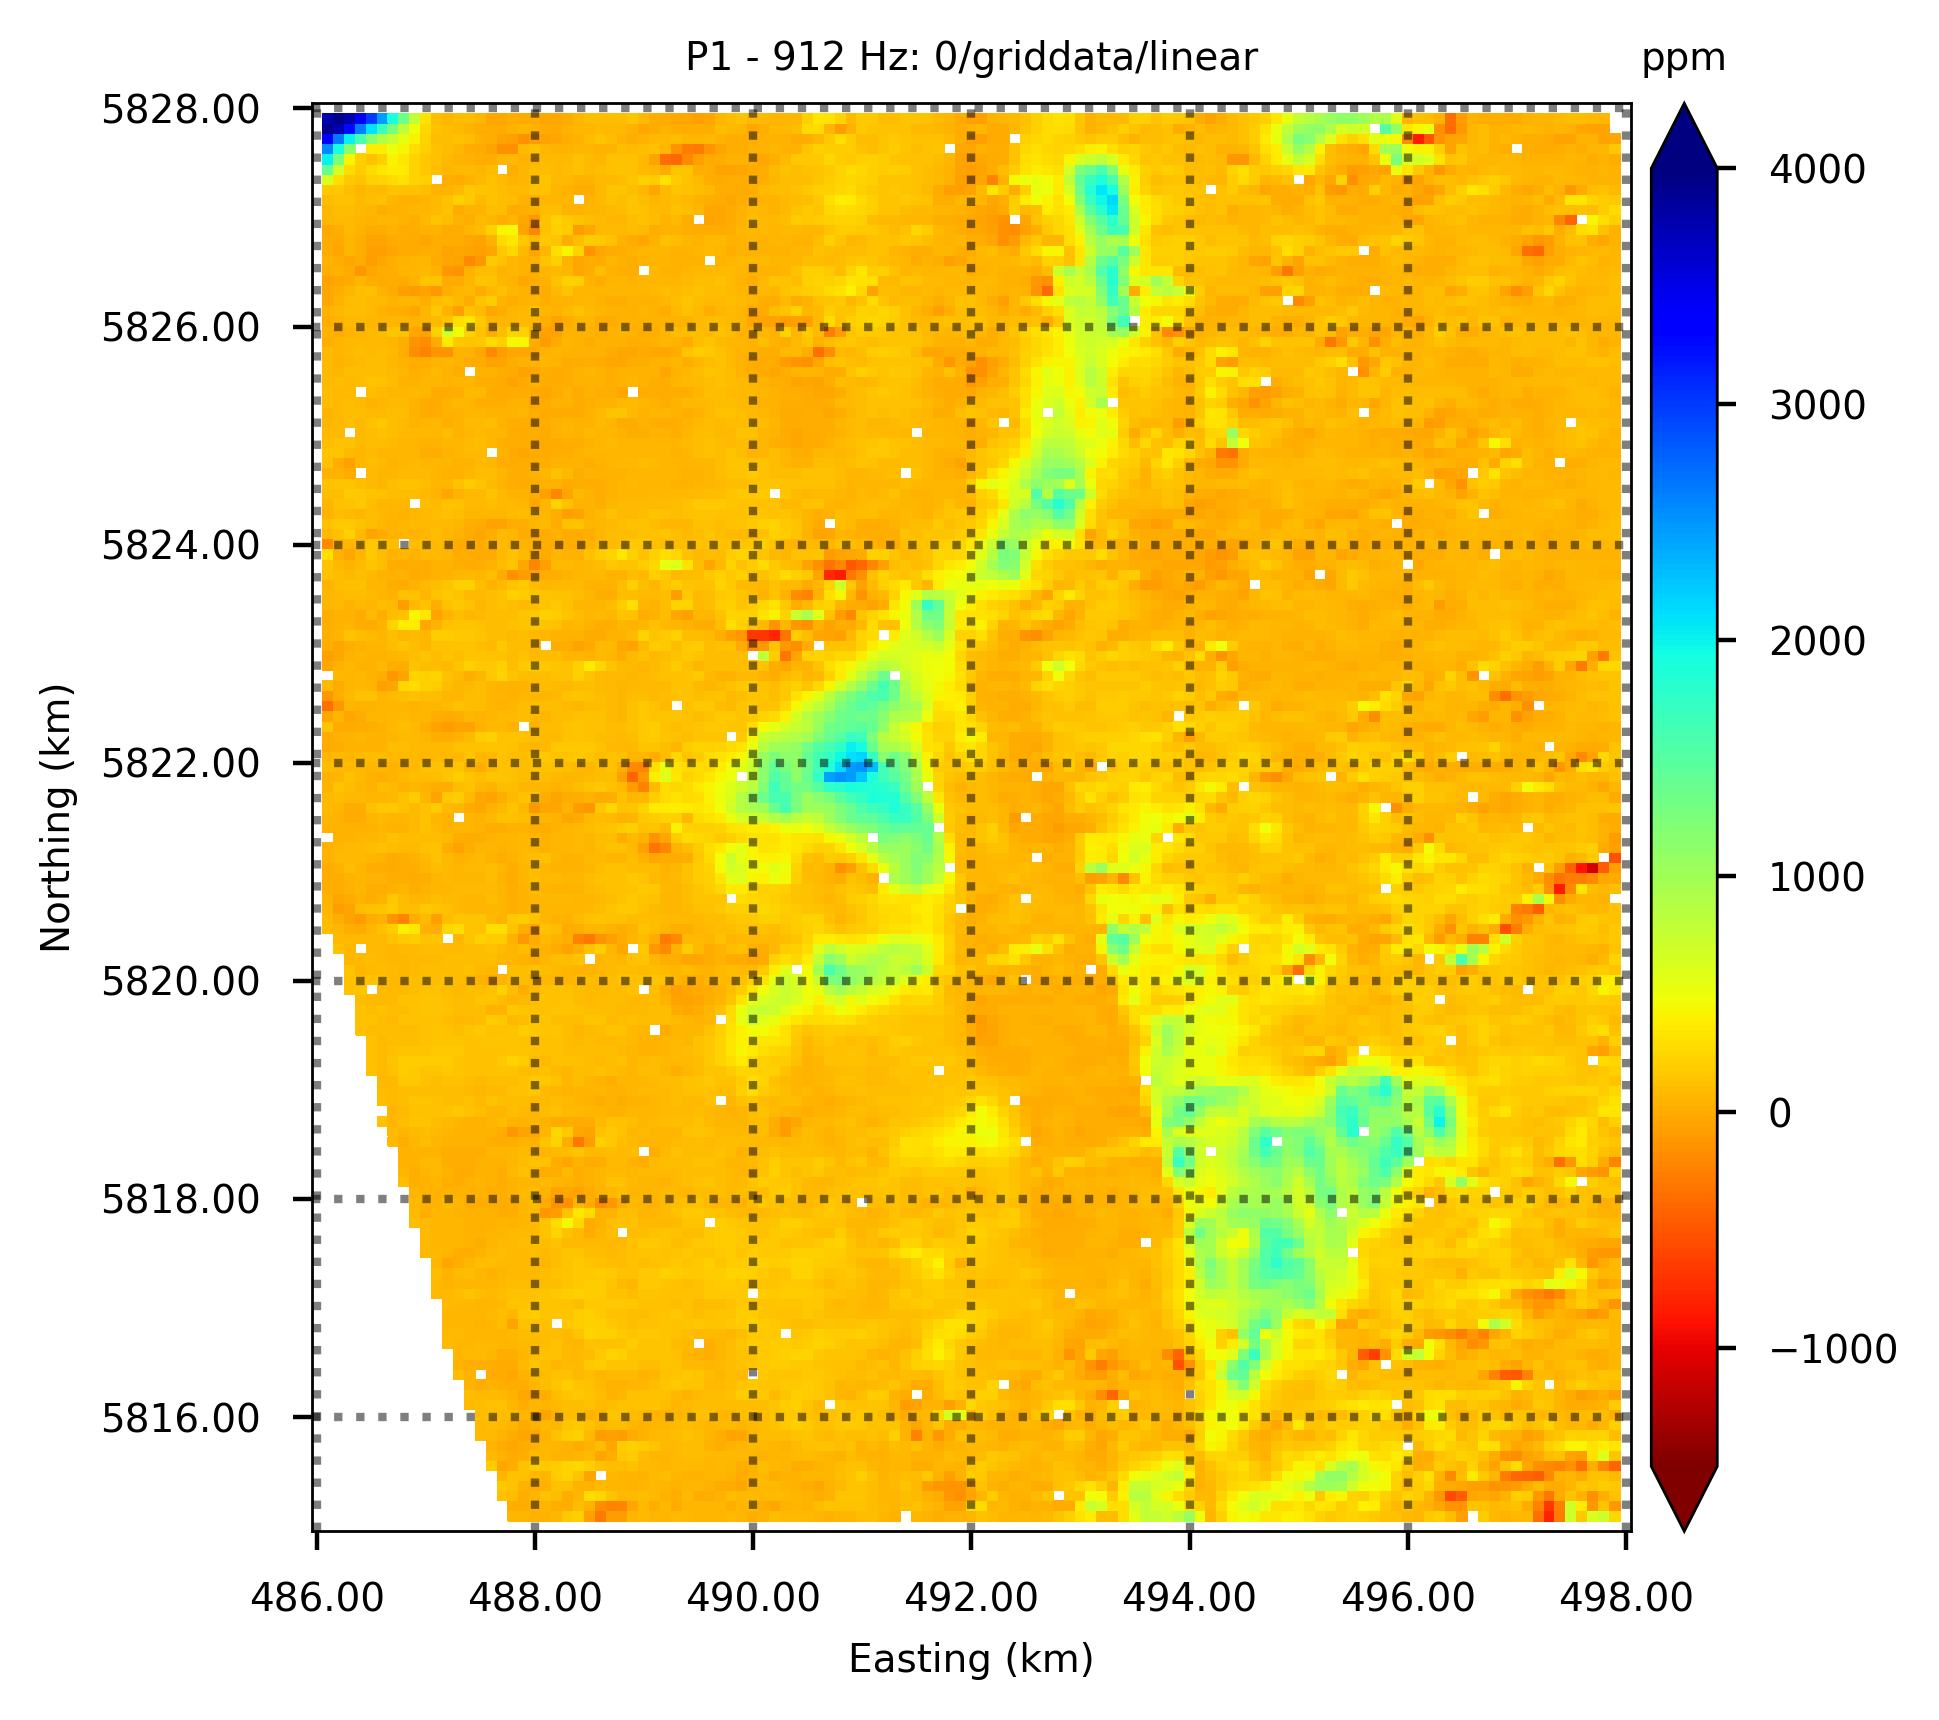

Plotting component Q1 - 912 Hz: 0/griddata/linear
Data, read   min=-1466.0   max=2428.0
Data, interpolated   min=-860.3502031441893   max=1936.3571140510649
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_Q1_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_Q1_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

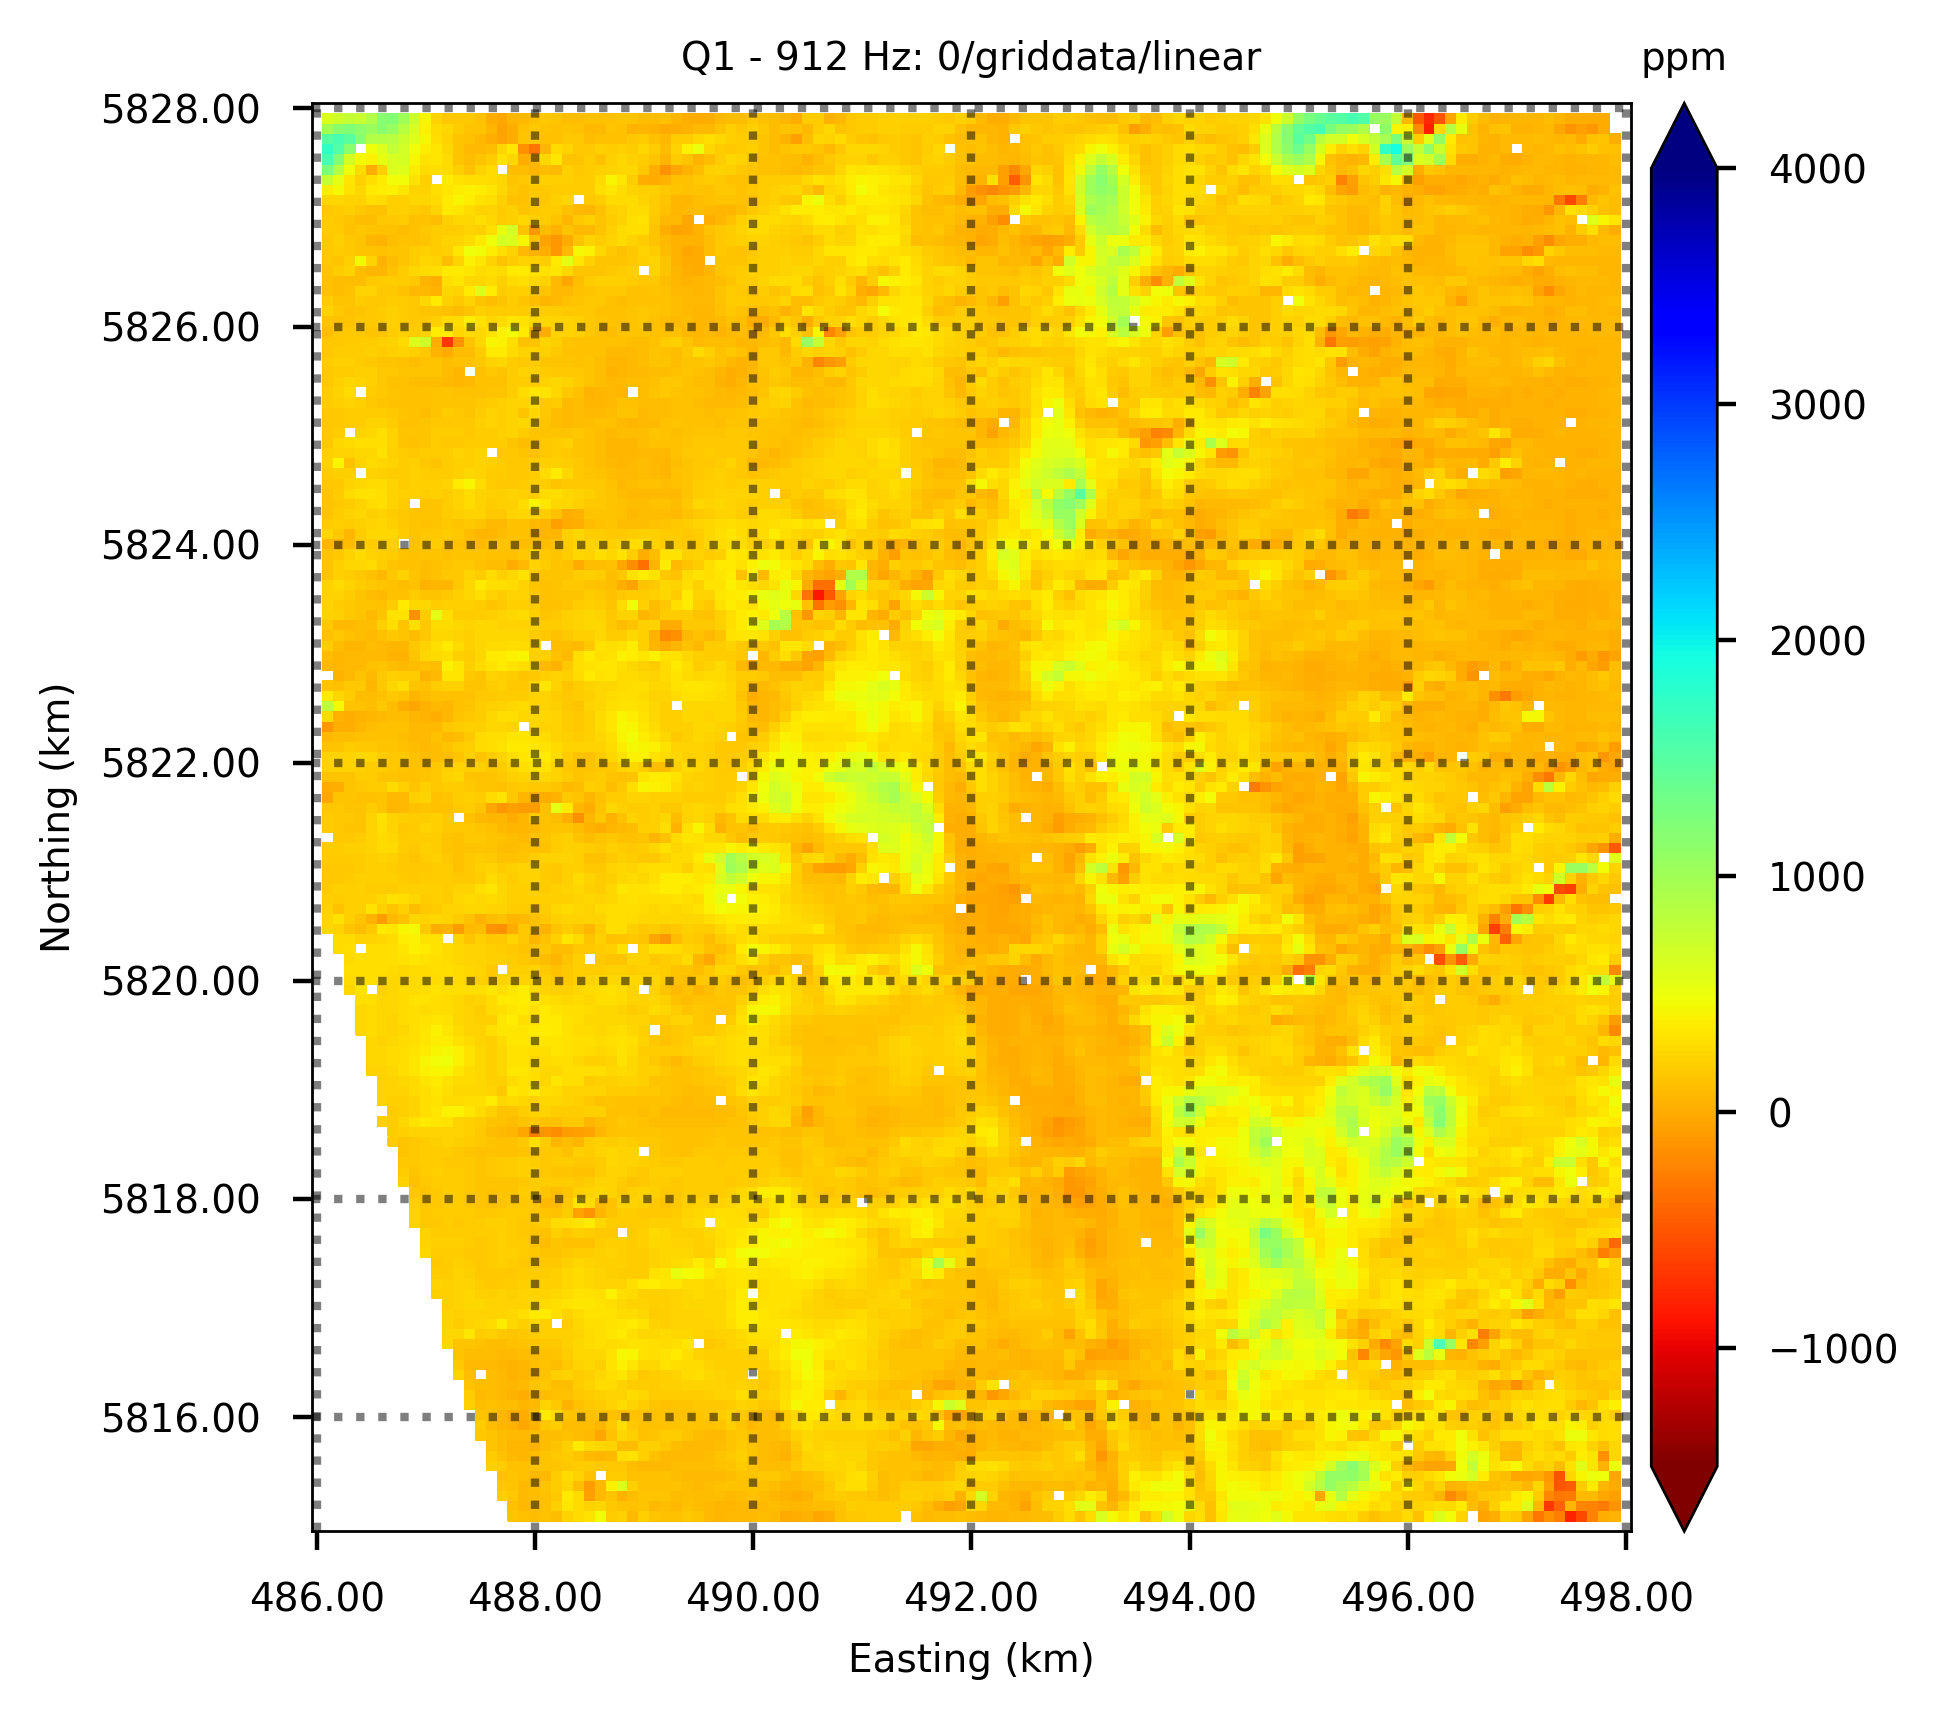

Plotting component P2 - 3005 Hz: 0/griddata/linear
Data, read   min=-564.0   max=4131.0
Data, interpolated   min=-357.1468685414998   max=4062.5239888163846
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_P2_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_P2_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

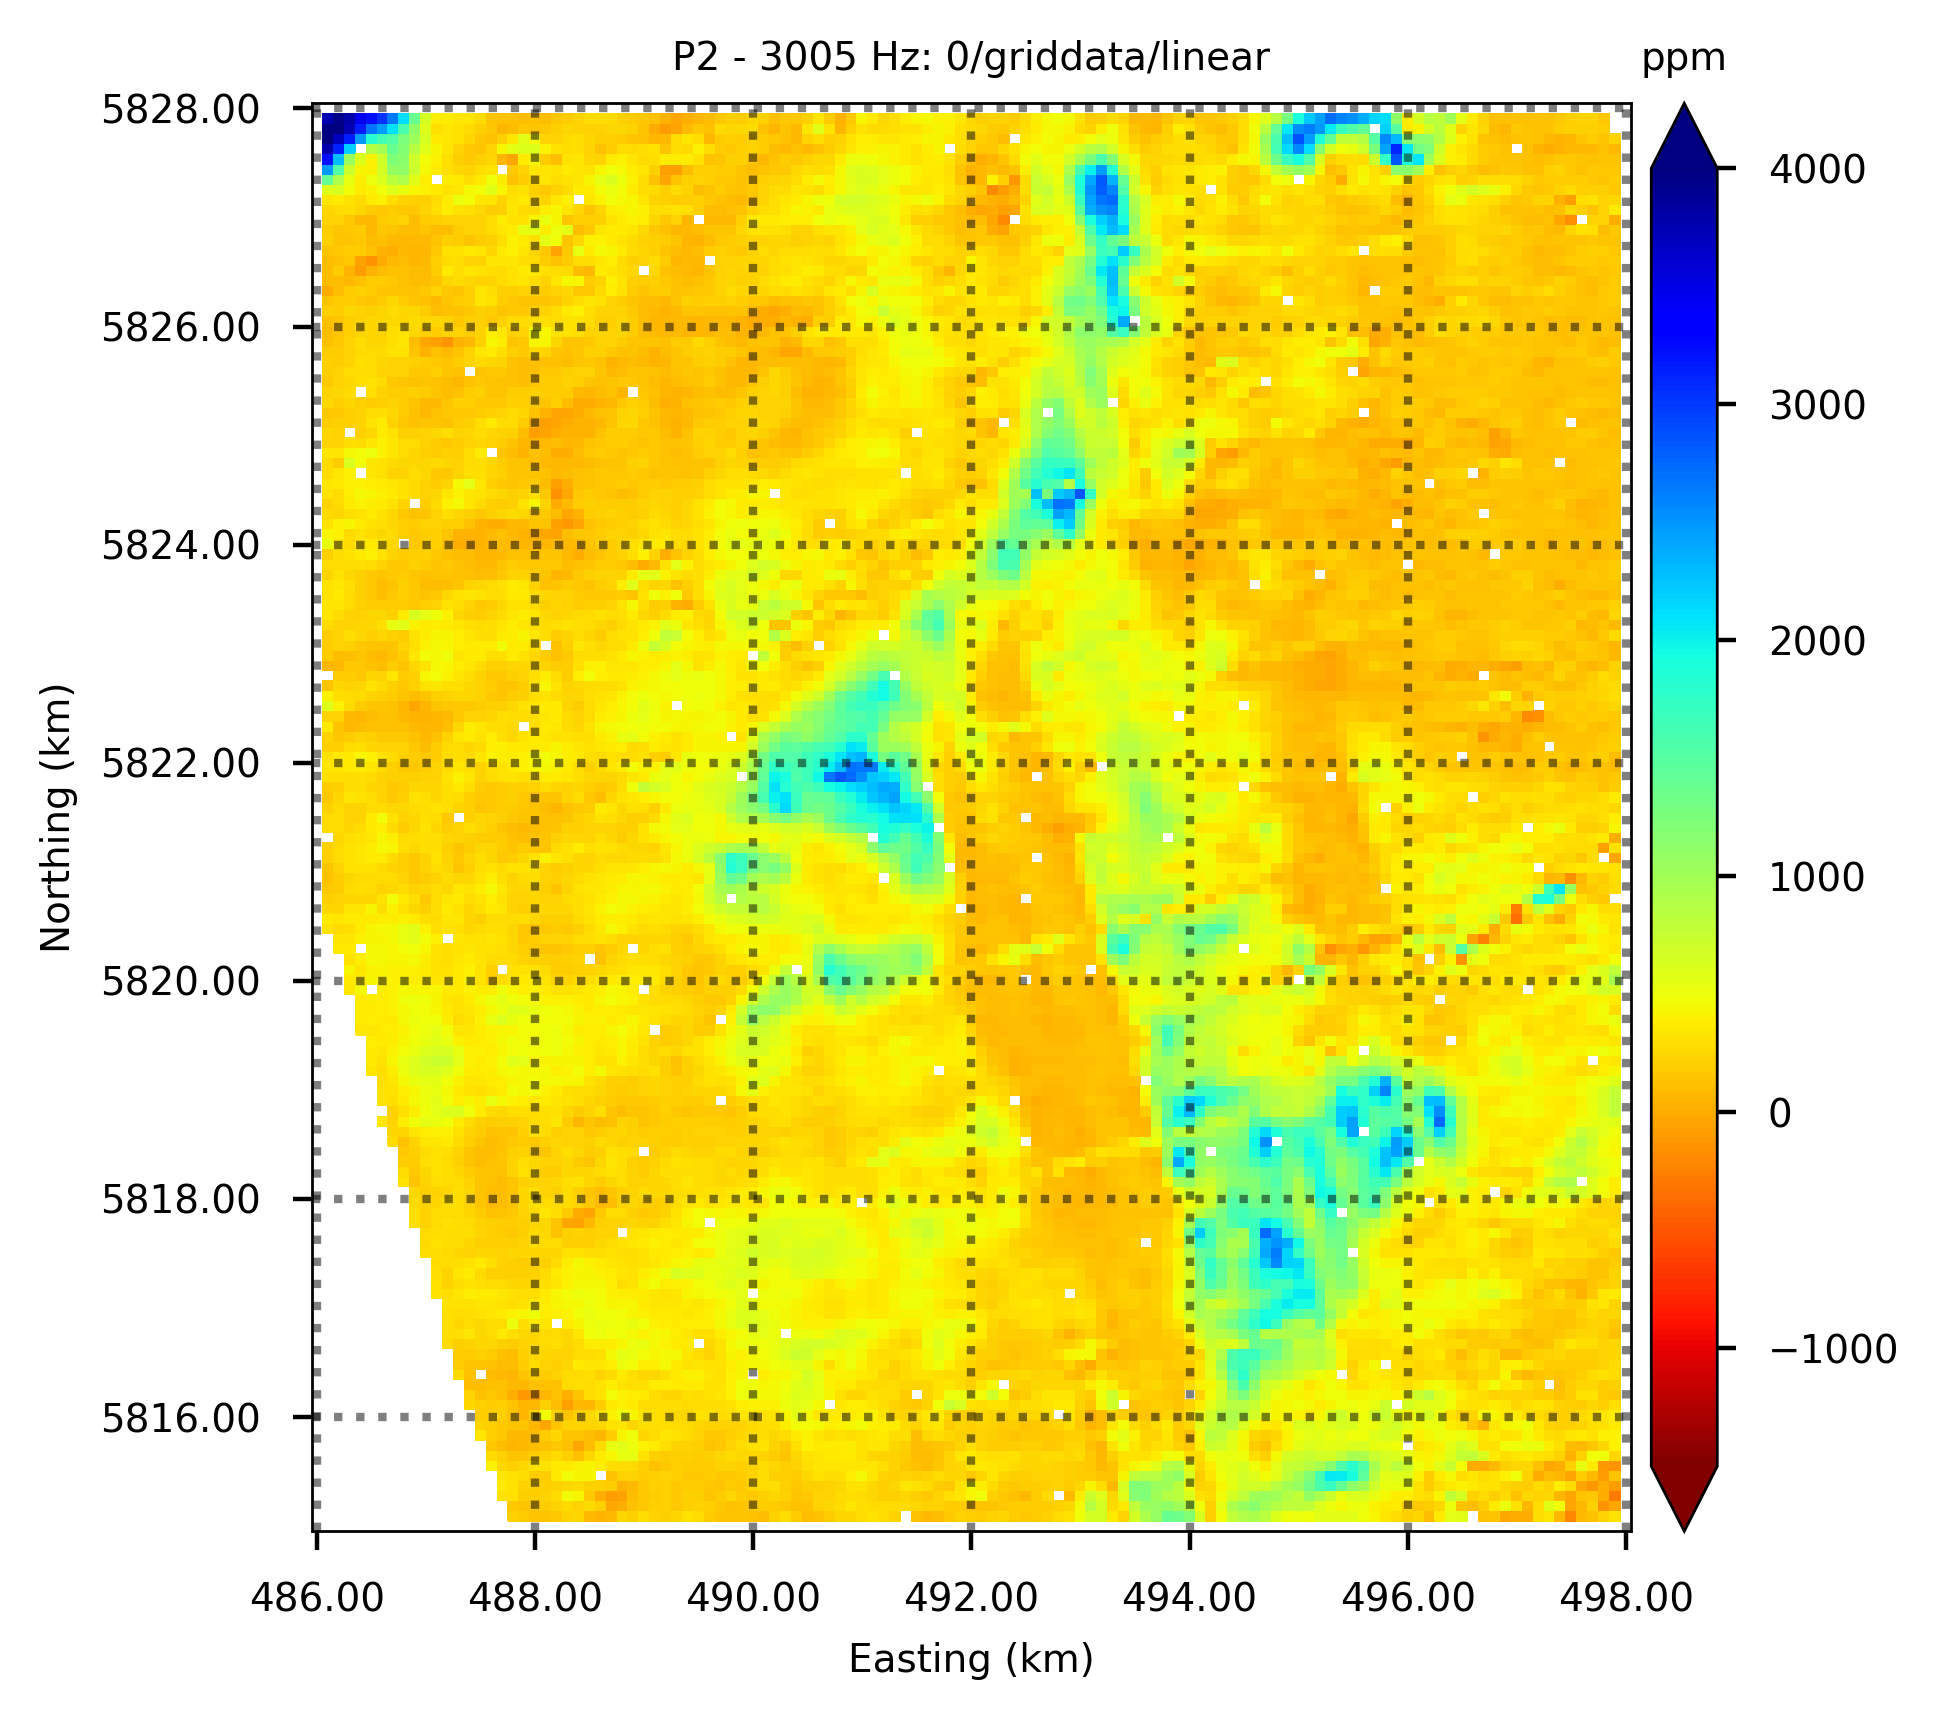

Plotting component Q2 - 3005 Hz: 0/griddata/linear
Data, read   min=-1527.0   max=2160.0
Data, interpolated   min=-904.5942360991164   max=1942.417332853796
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_Q2_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_Q2_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

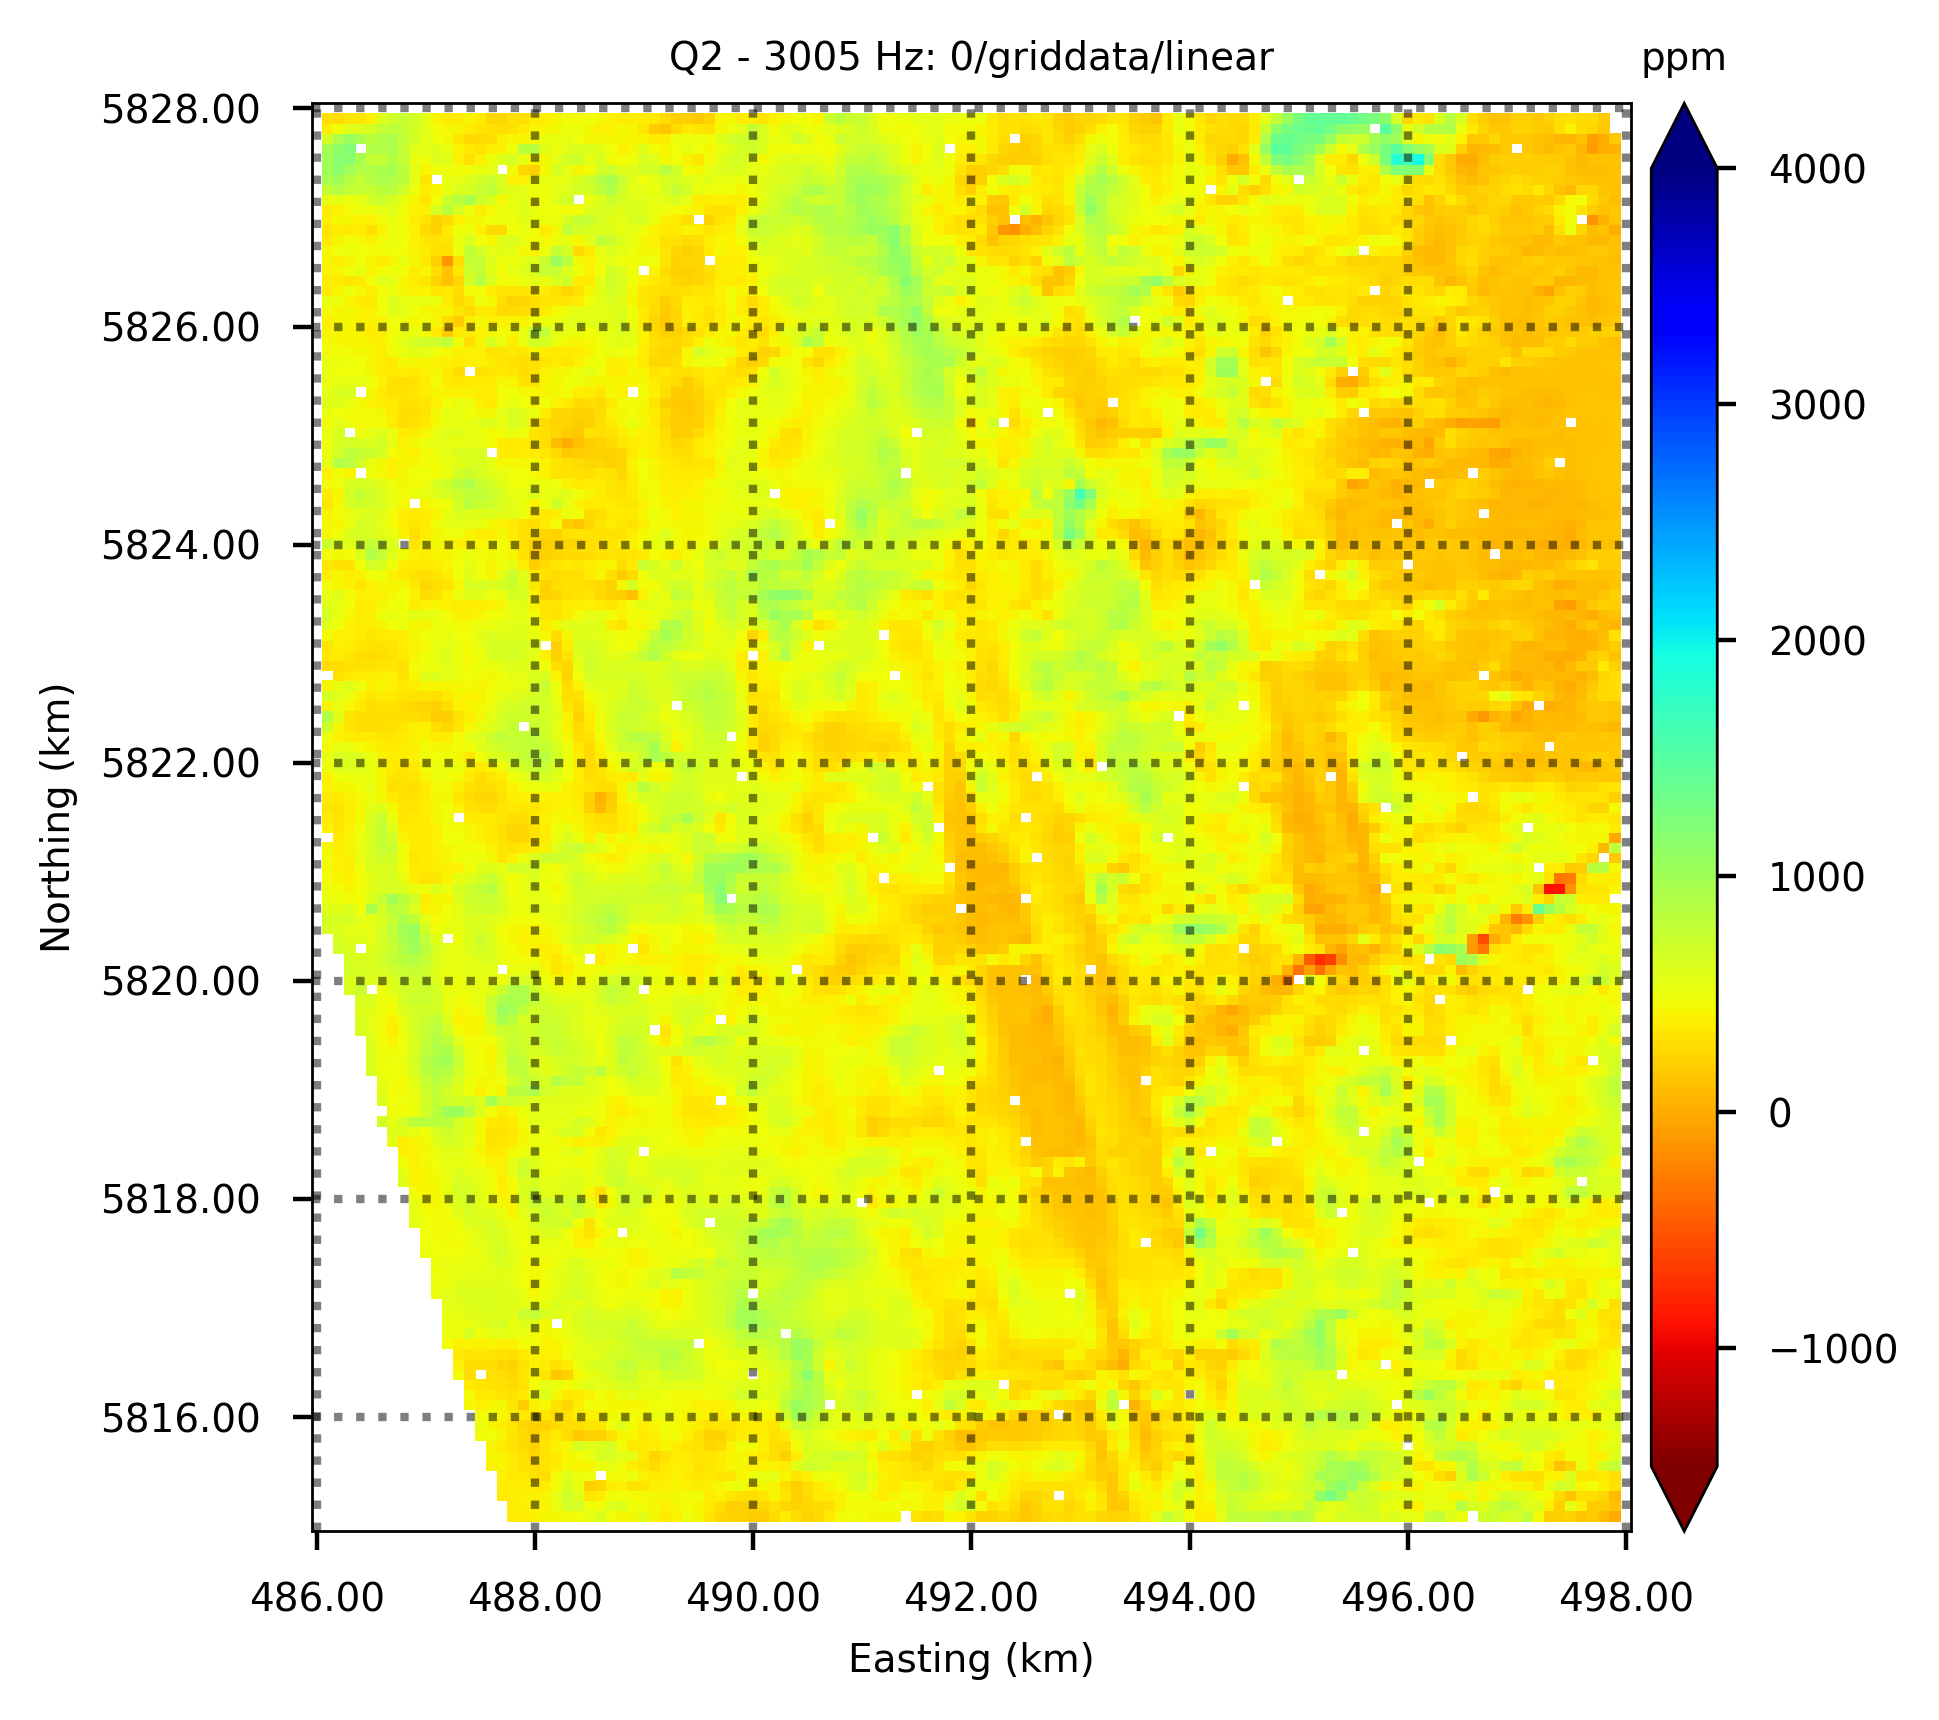

Plotting component P3 - 11962 Hz: 0/griddata/linear
Data, read   min=-212.0   max=4979.0
Data, interpolated   min=-112.11197786838115   max=4869.134170411442
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_P3_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_P3_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

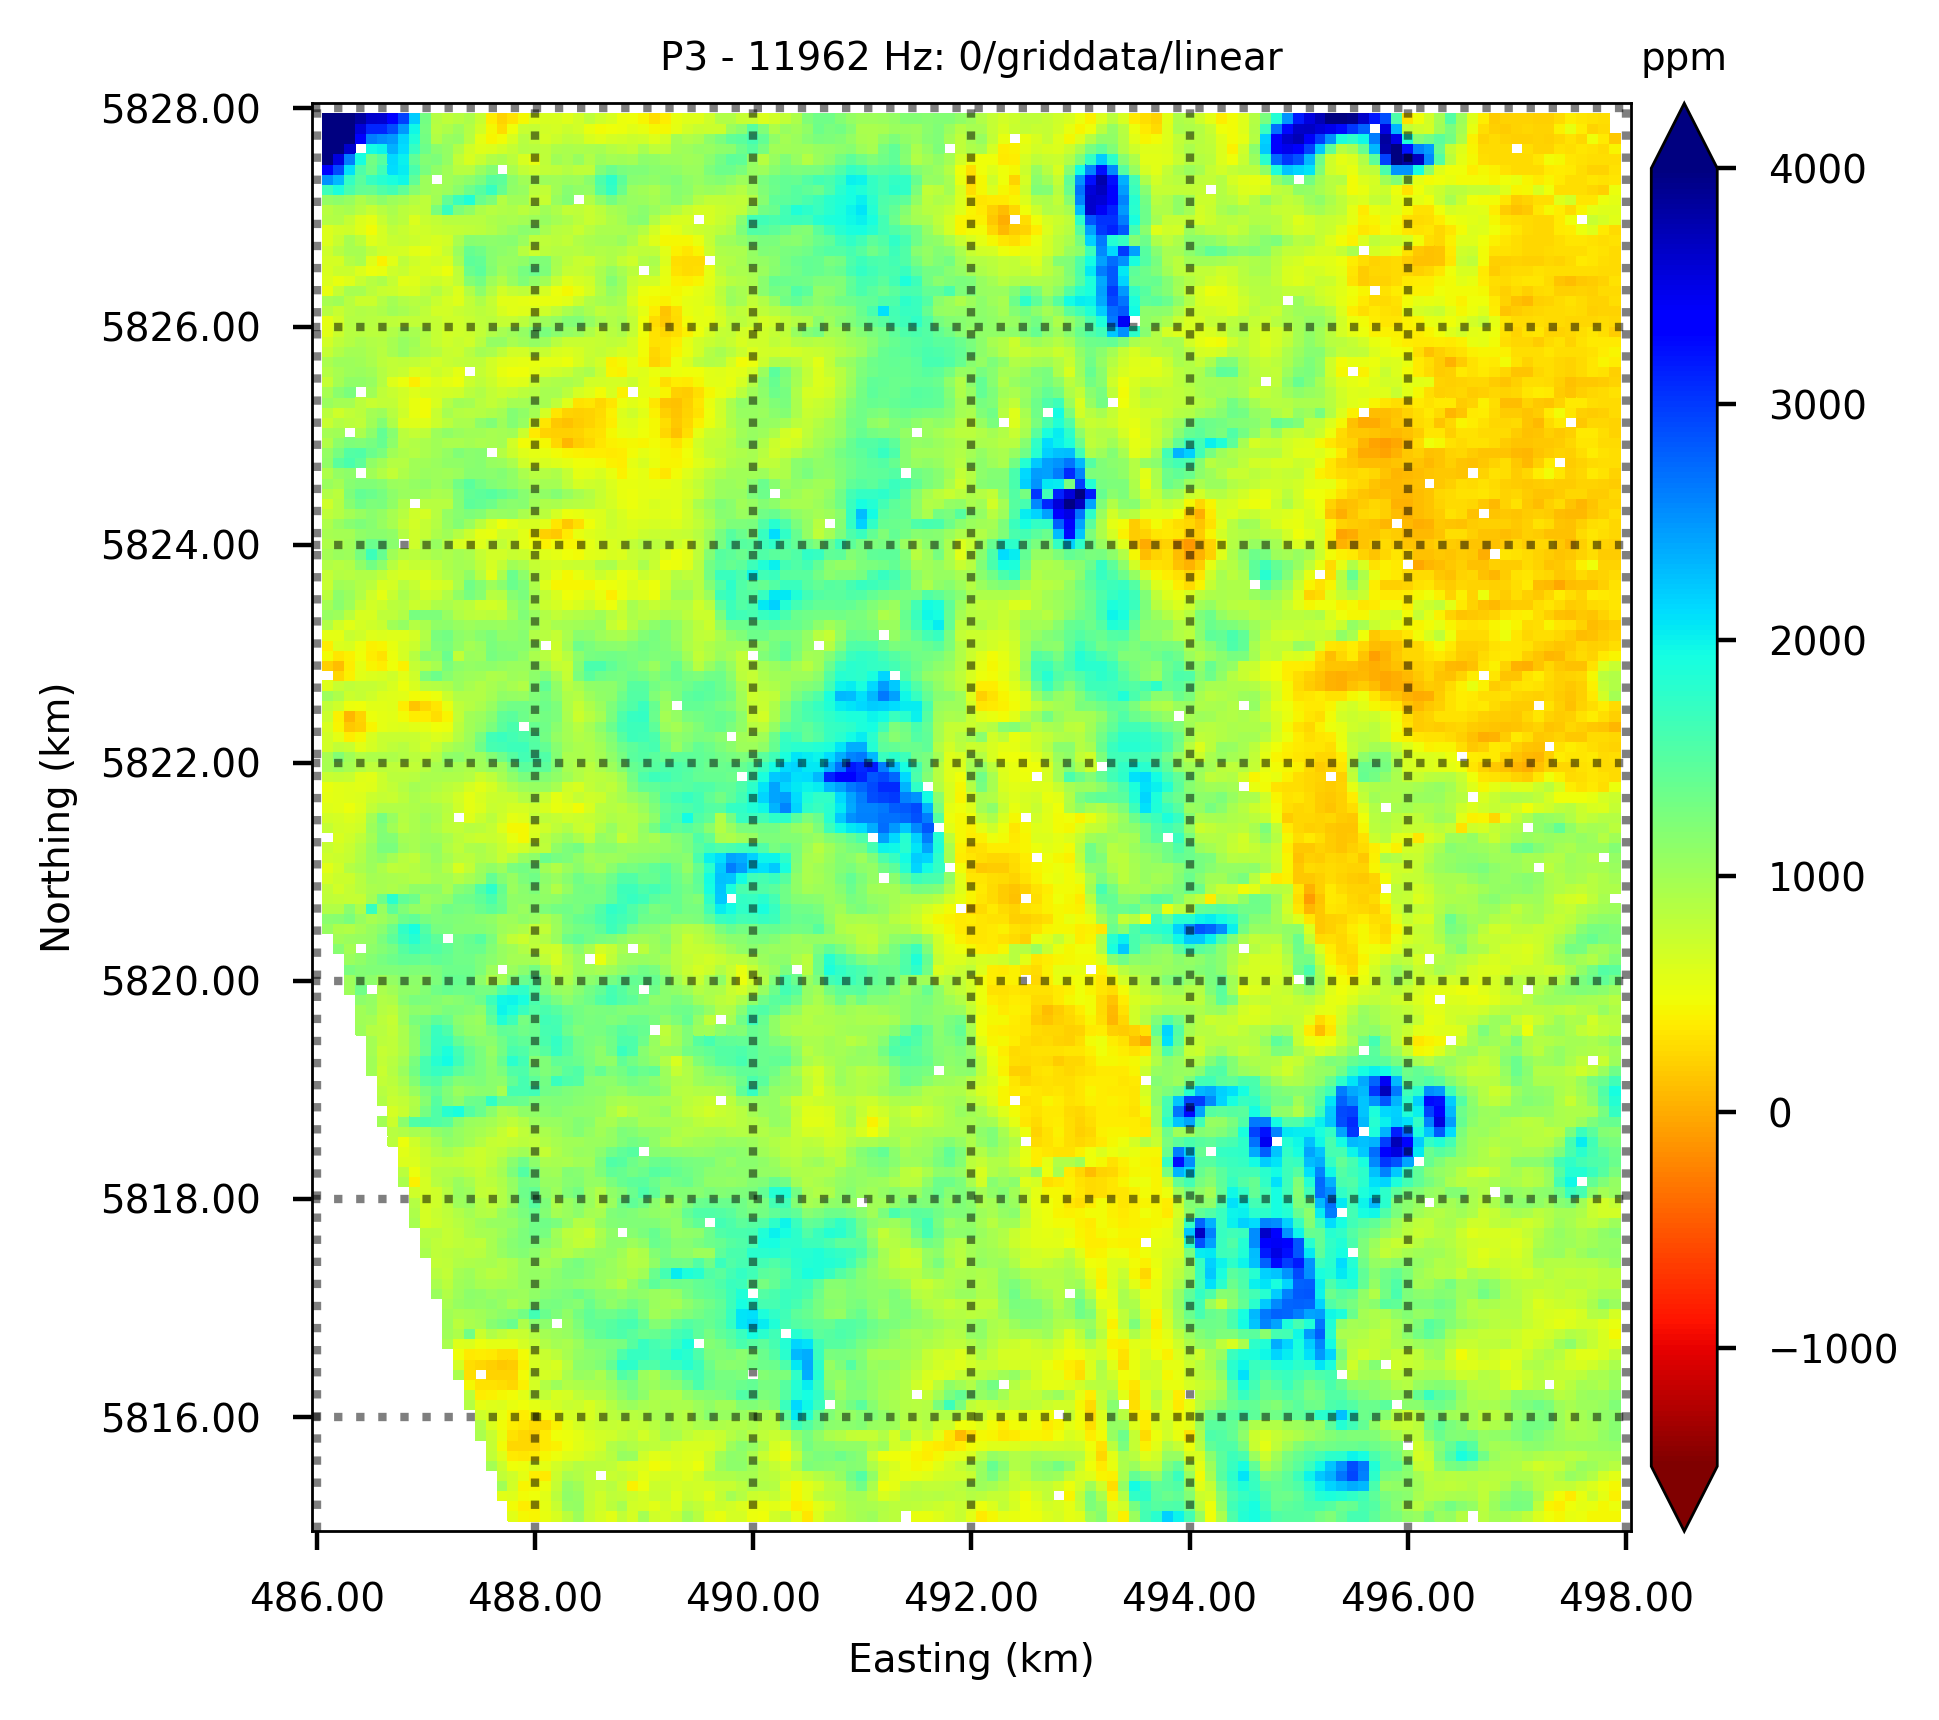

Plotting component Q3 - 11962 Hz: 0/griddata/linear
Data, read   min=61.0   max=2122.0
Data, interpolated   min=68.25114985909696   max=1992.9830410587185
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_Q3_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_Q3_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

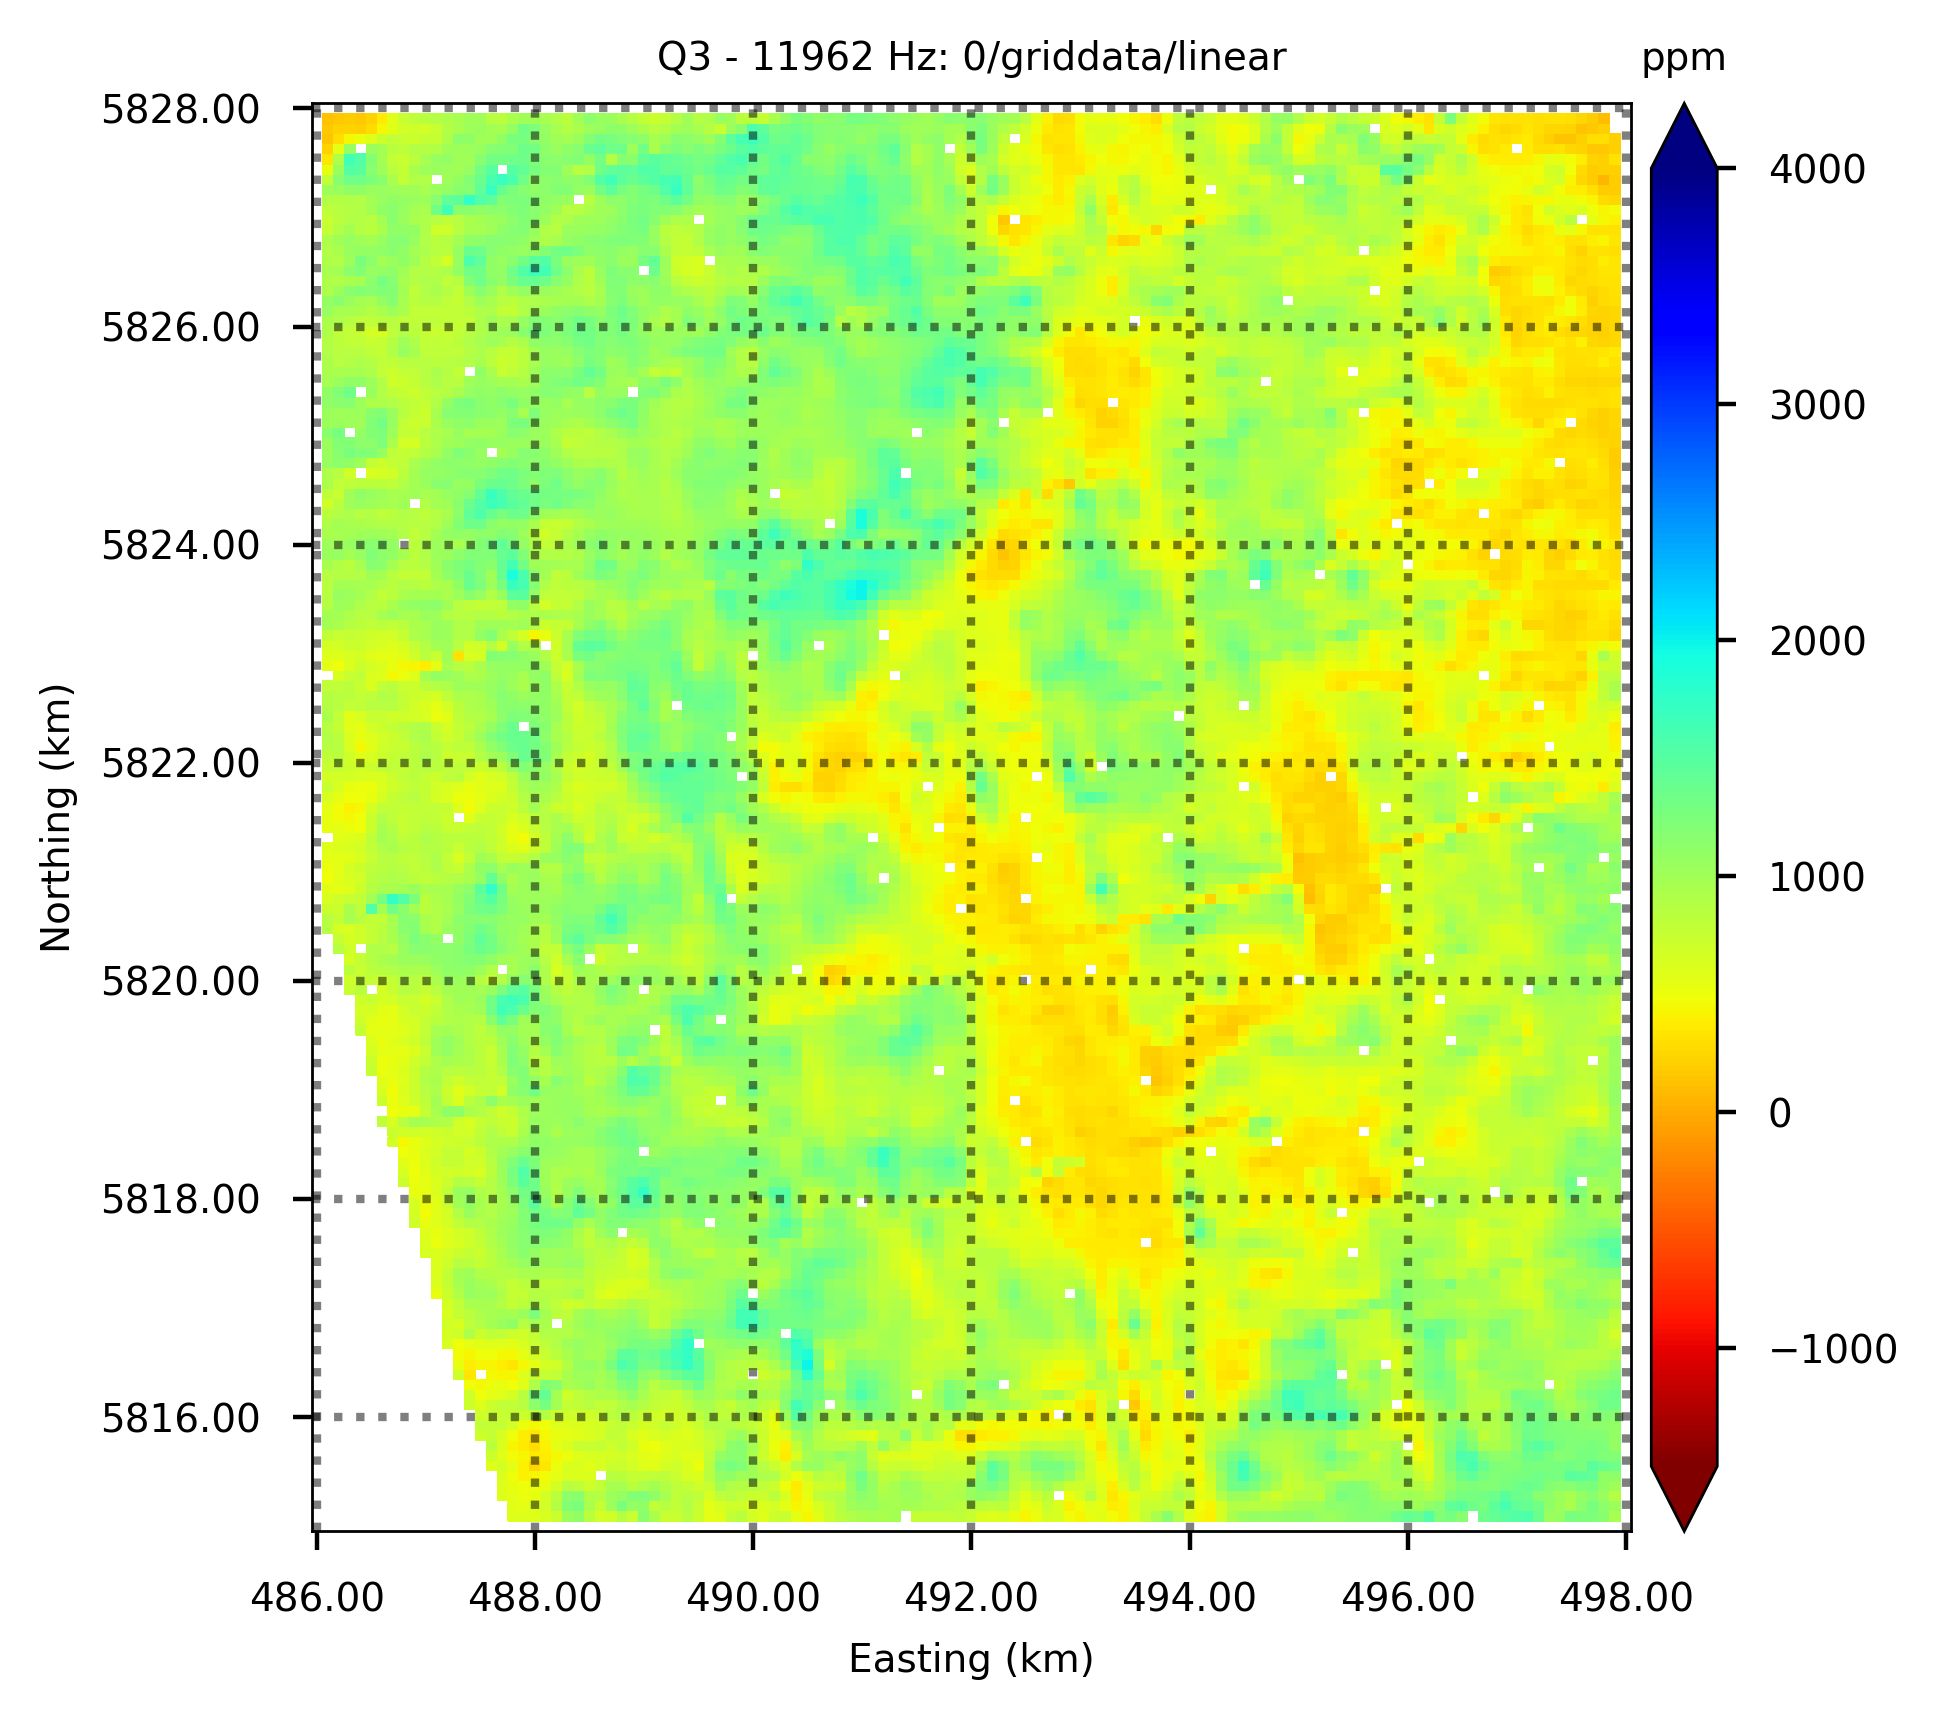

Plotting component P4 - 24510 Hz: 0/griddata/linear
Data, read   min=-415.0   max=5422.0
Data, interpolated   min=-295.7311083765365   max=5330.756434187546
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_P4_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_P4_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

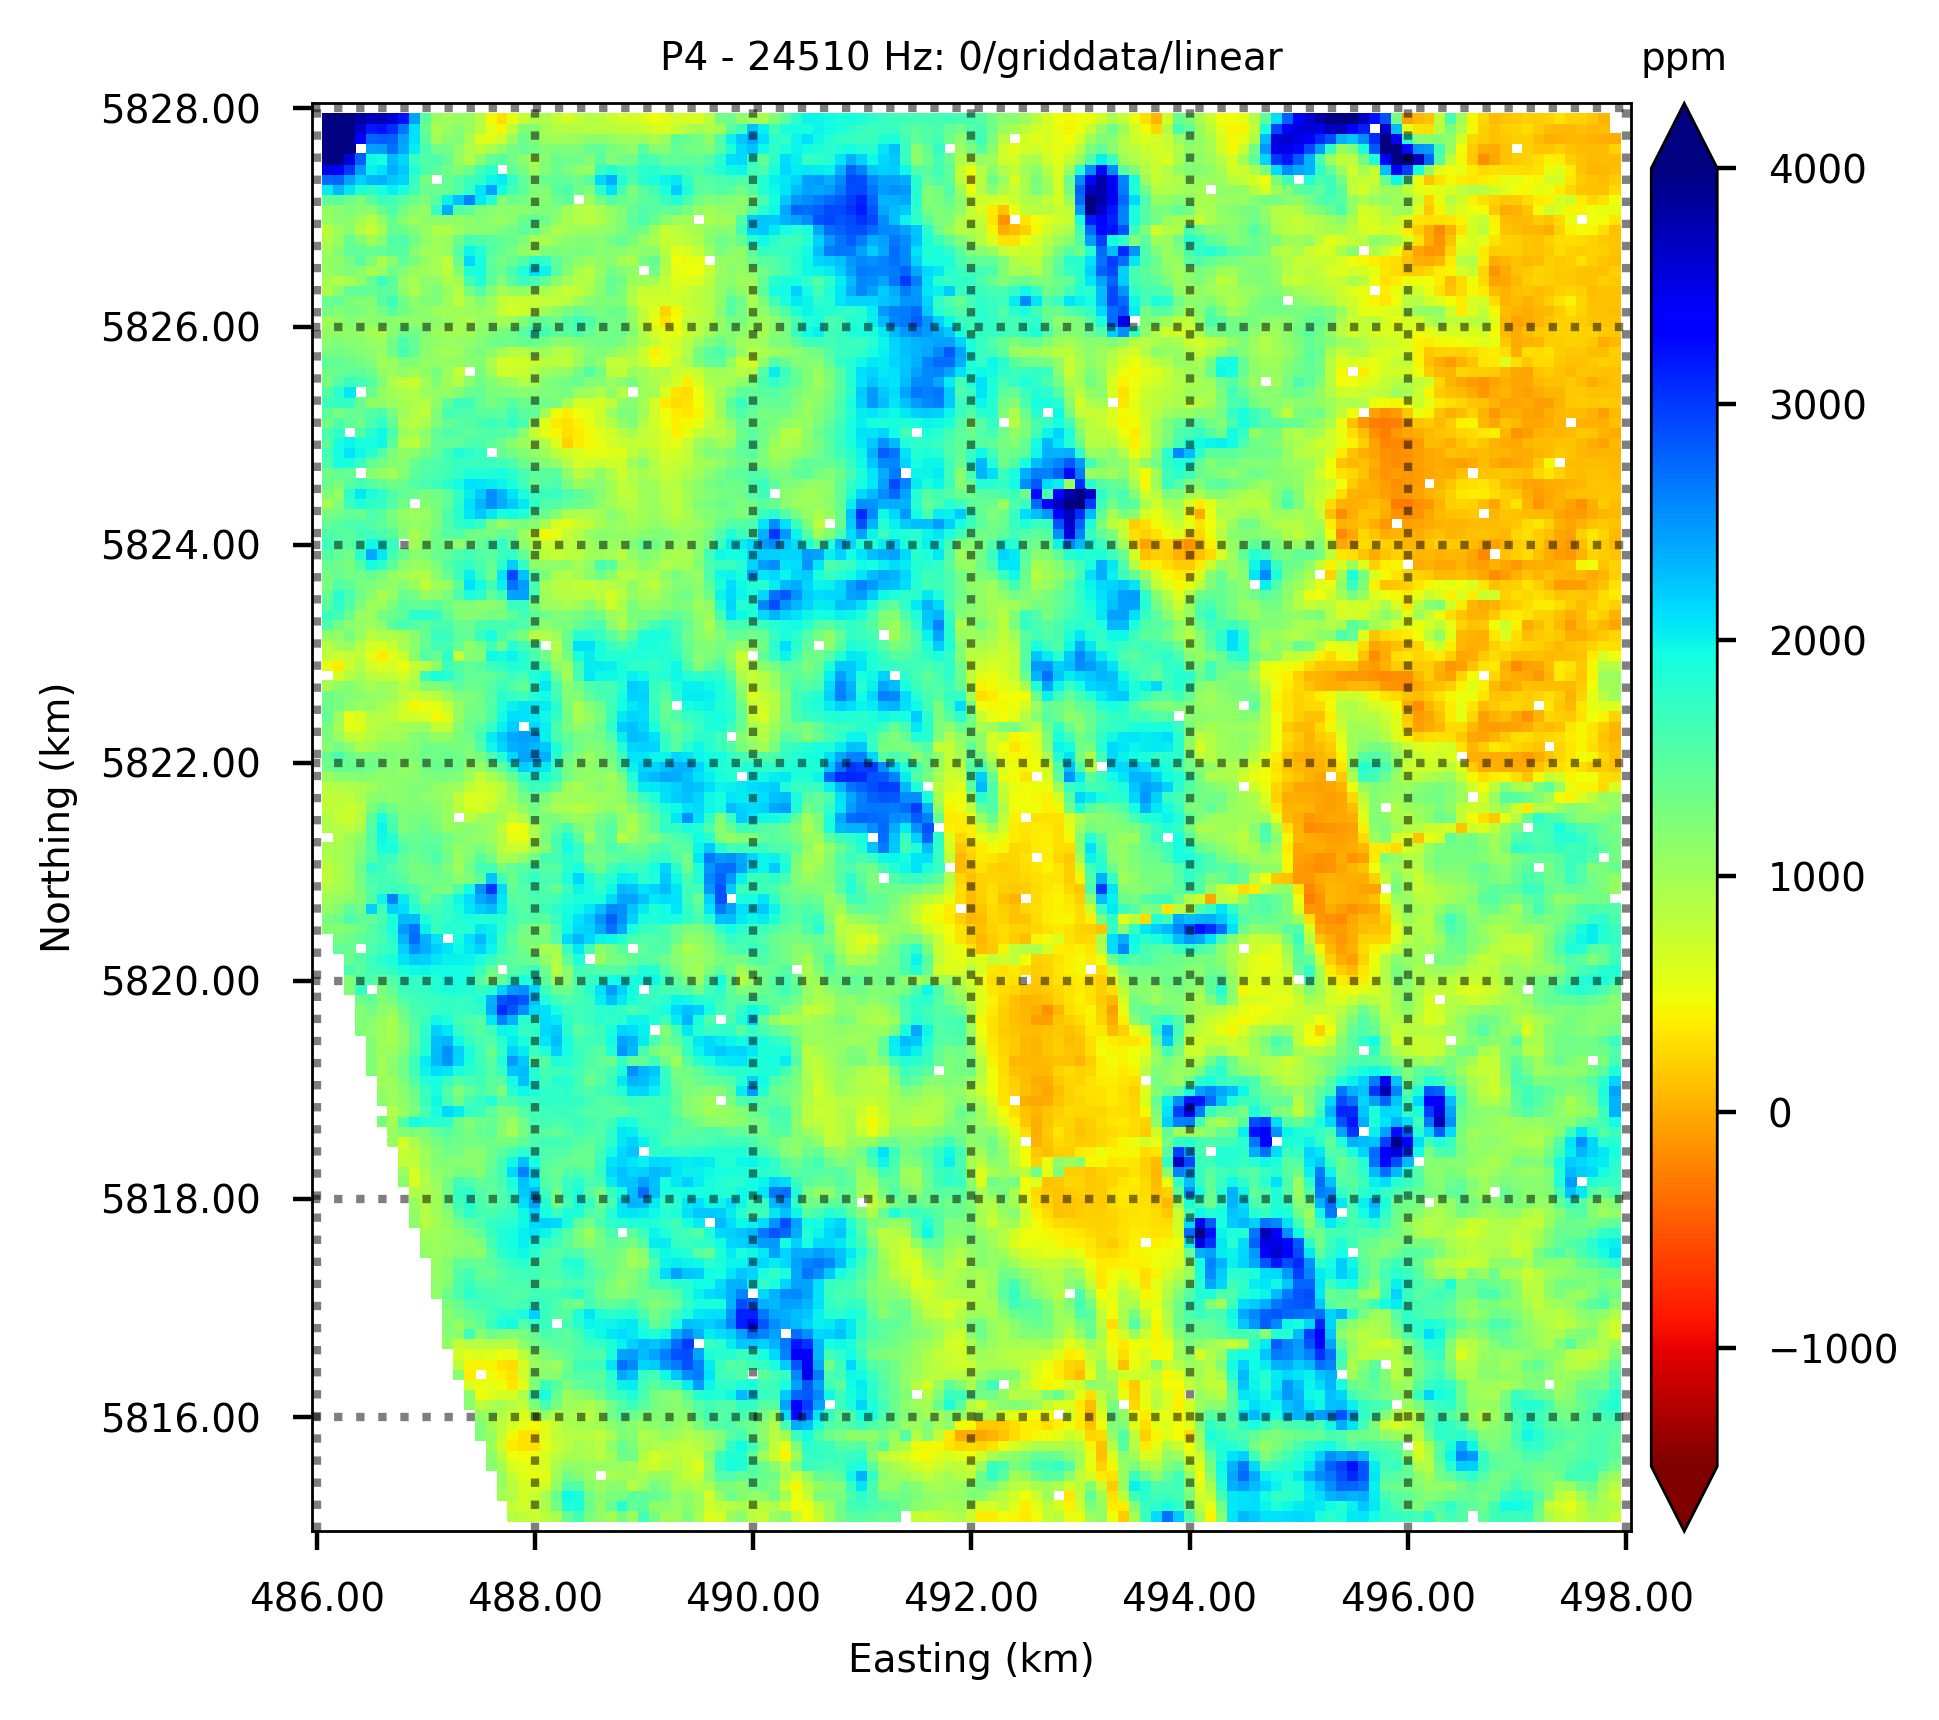

Plotting component Q4 - 24510 Hz: 0/griddata/linear
Data, read   min=-62.0   max=2722.0
Data, interpolated   min=-5.789898310785995   max=2651.982692757176
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_Q4_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_Q4_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

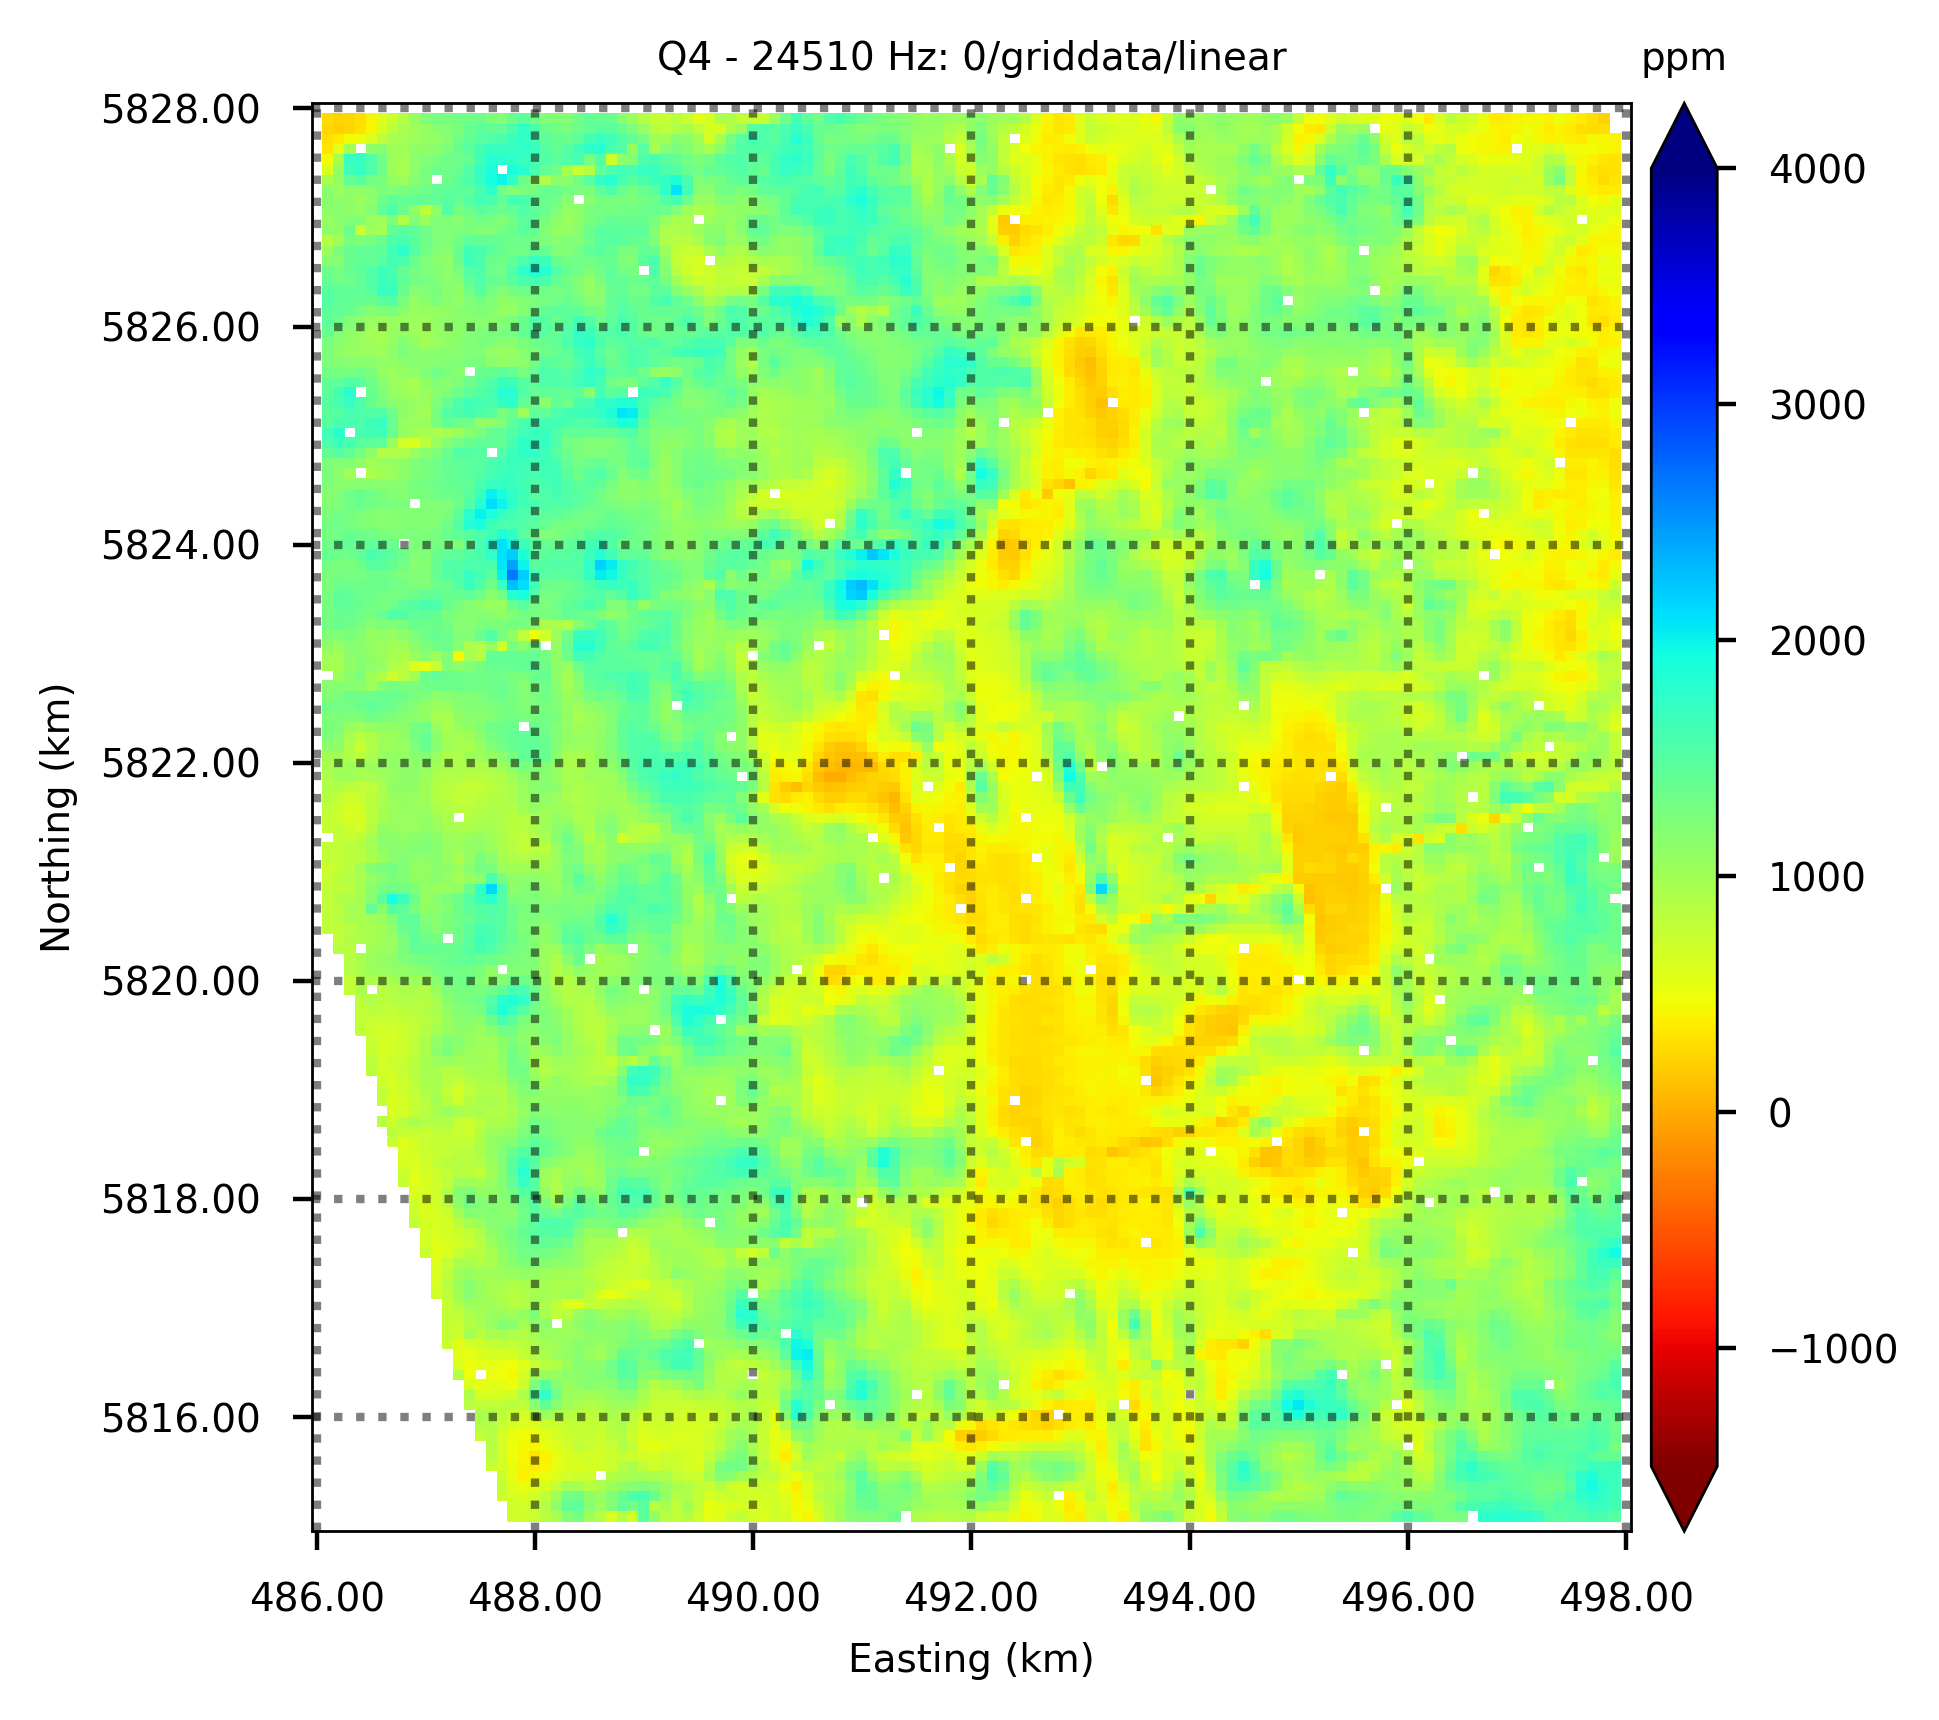

Plotting component PLM: 0/griddata/linear
Data, read   min=-0.04   max=151.53
Data, interpolated   min=3.0072188305132412   max=106.66279810609987
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_PLM_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_PLM_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

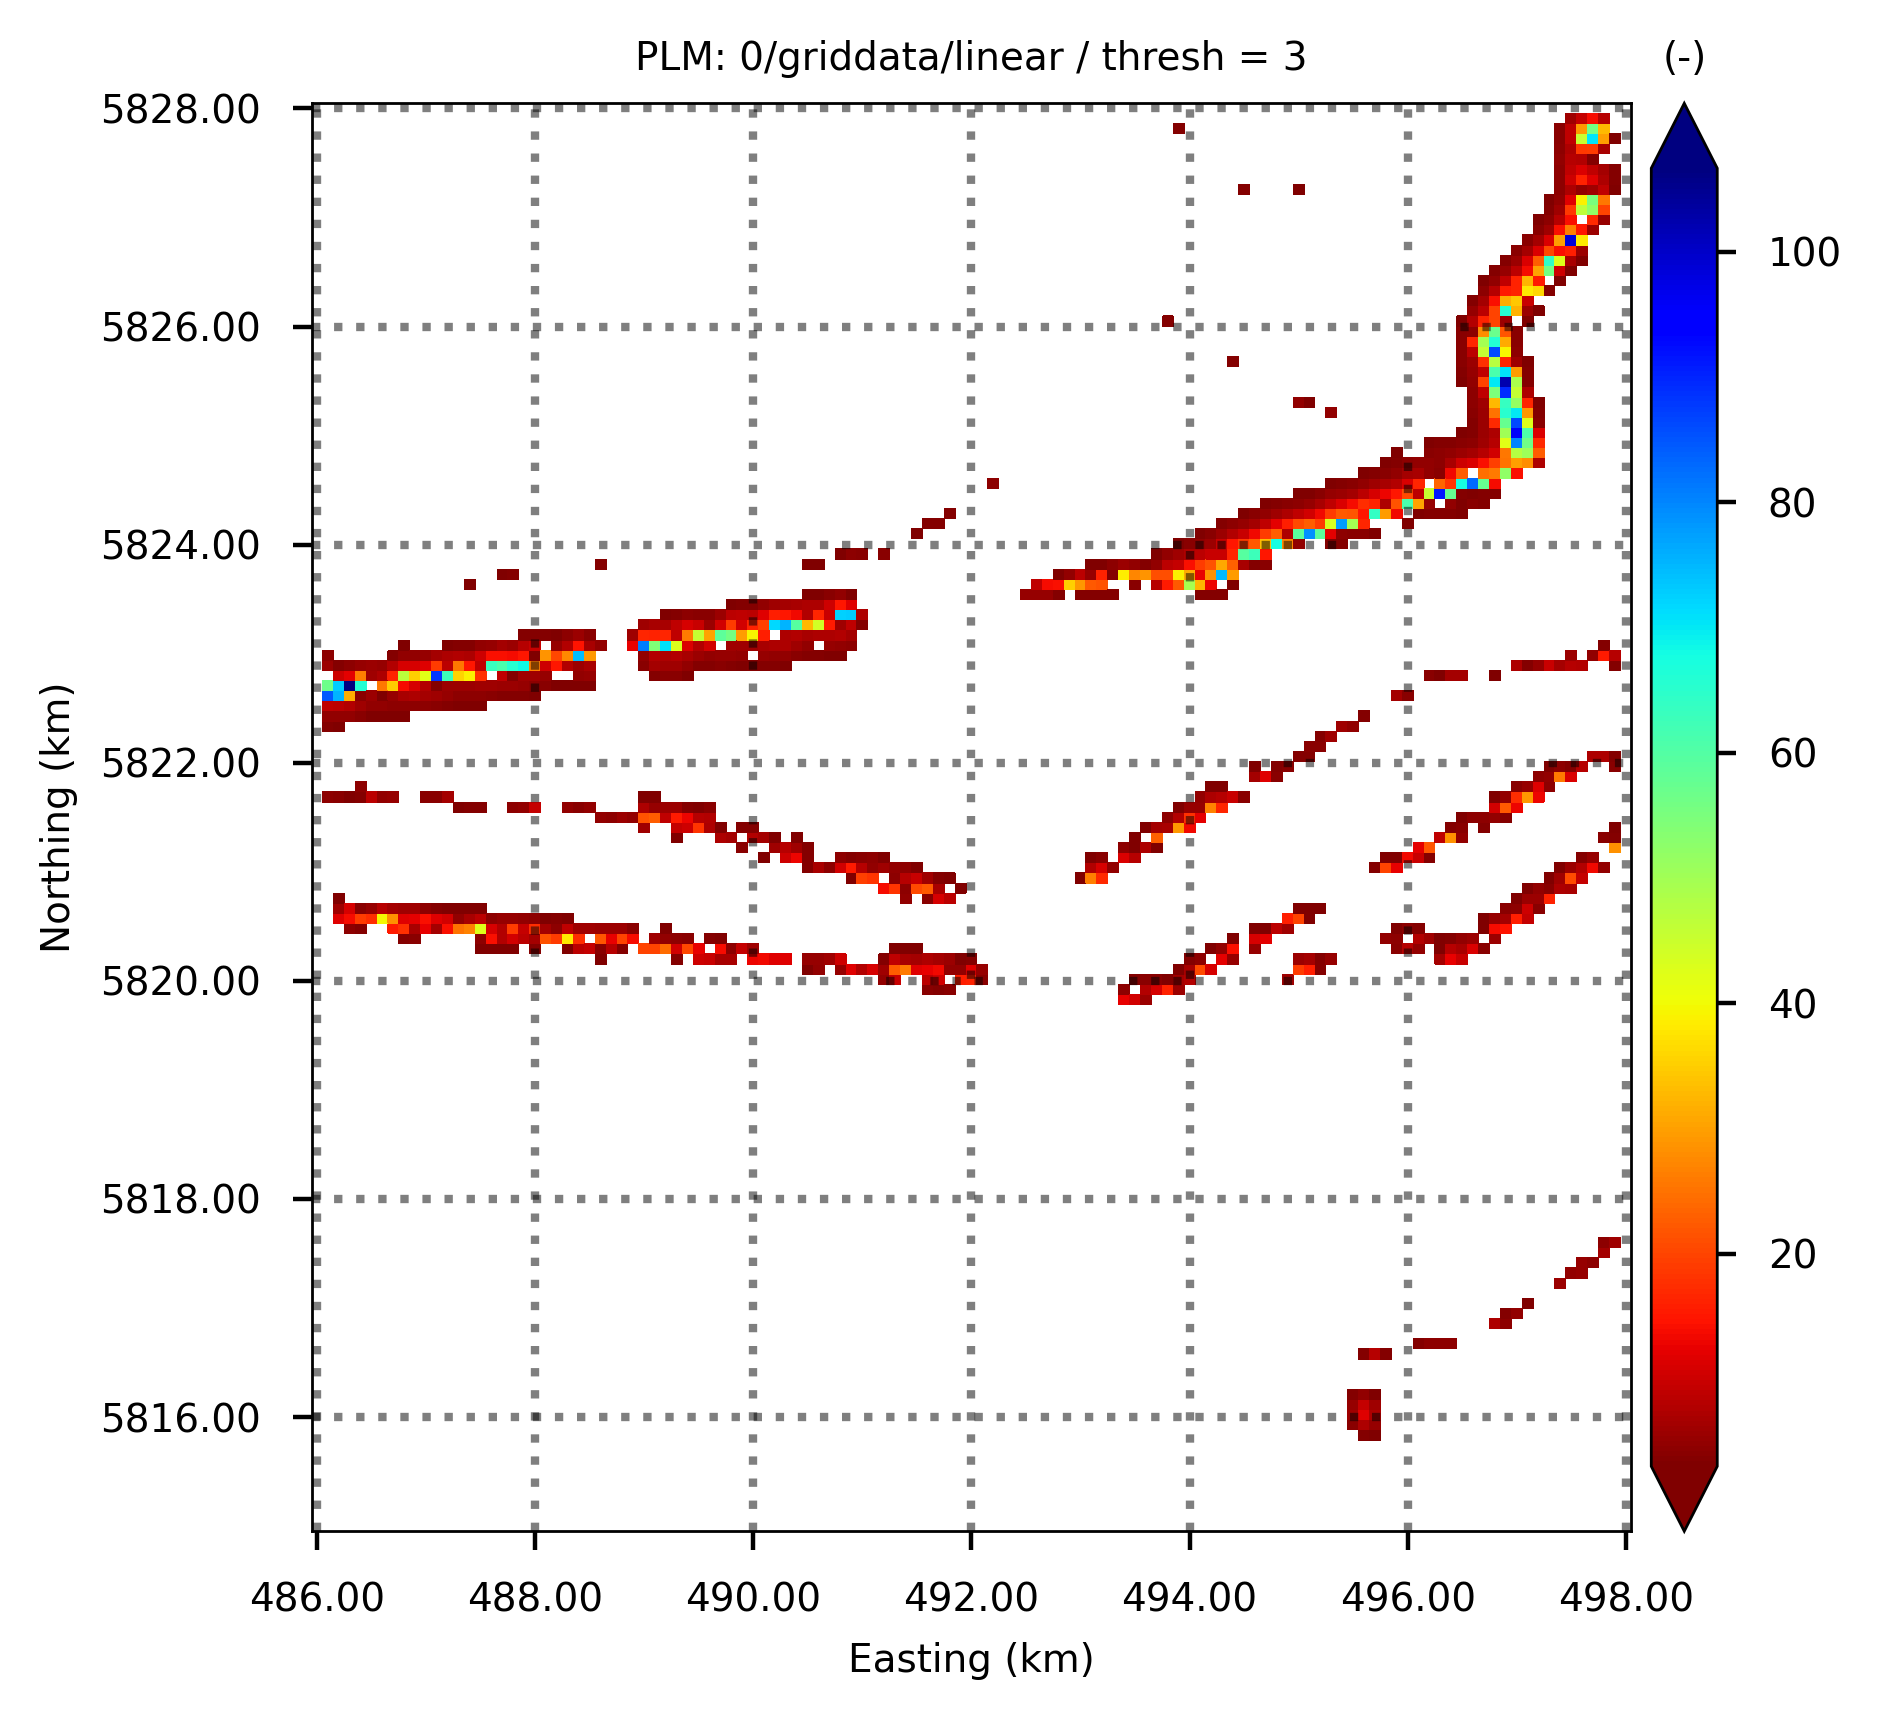

Plotting component ALT: 0/griddata/linear
Data, read   min=38.27   max=343.83
Data, interpolated   min=43.34704458309819   max=124.93452682050929
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_ALT_griddata_linear.pdf
Plot written to /home/vrath/AEMpyX_public//data//aem05_limerick/raw/plots/Limerick_shale_raw_aem05_image_ALT_griddata_linear.png


<Figure size 2560x1760 with 0 Axes>

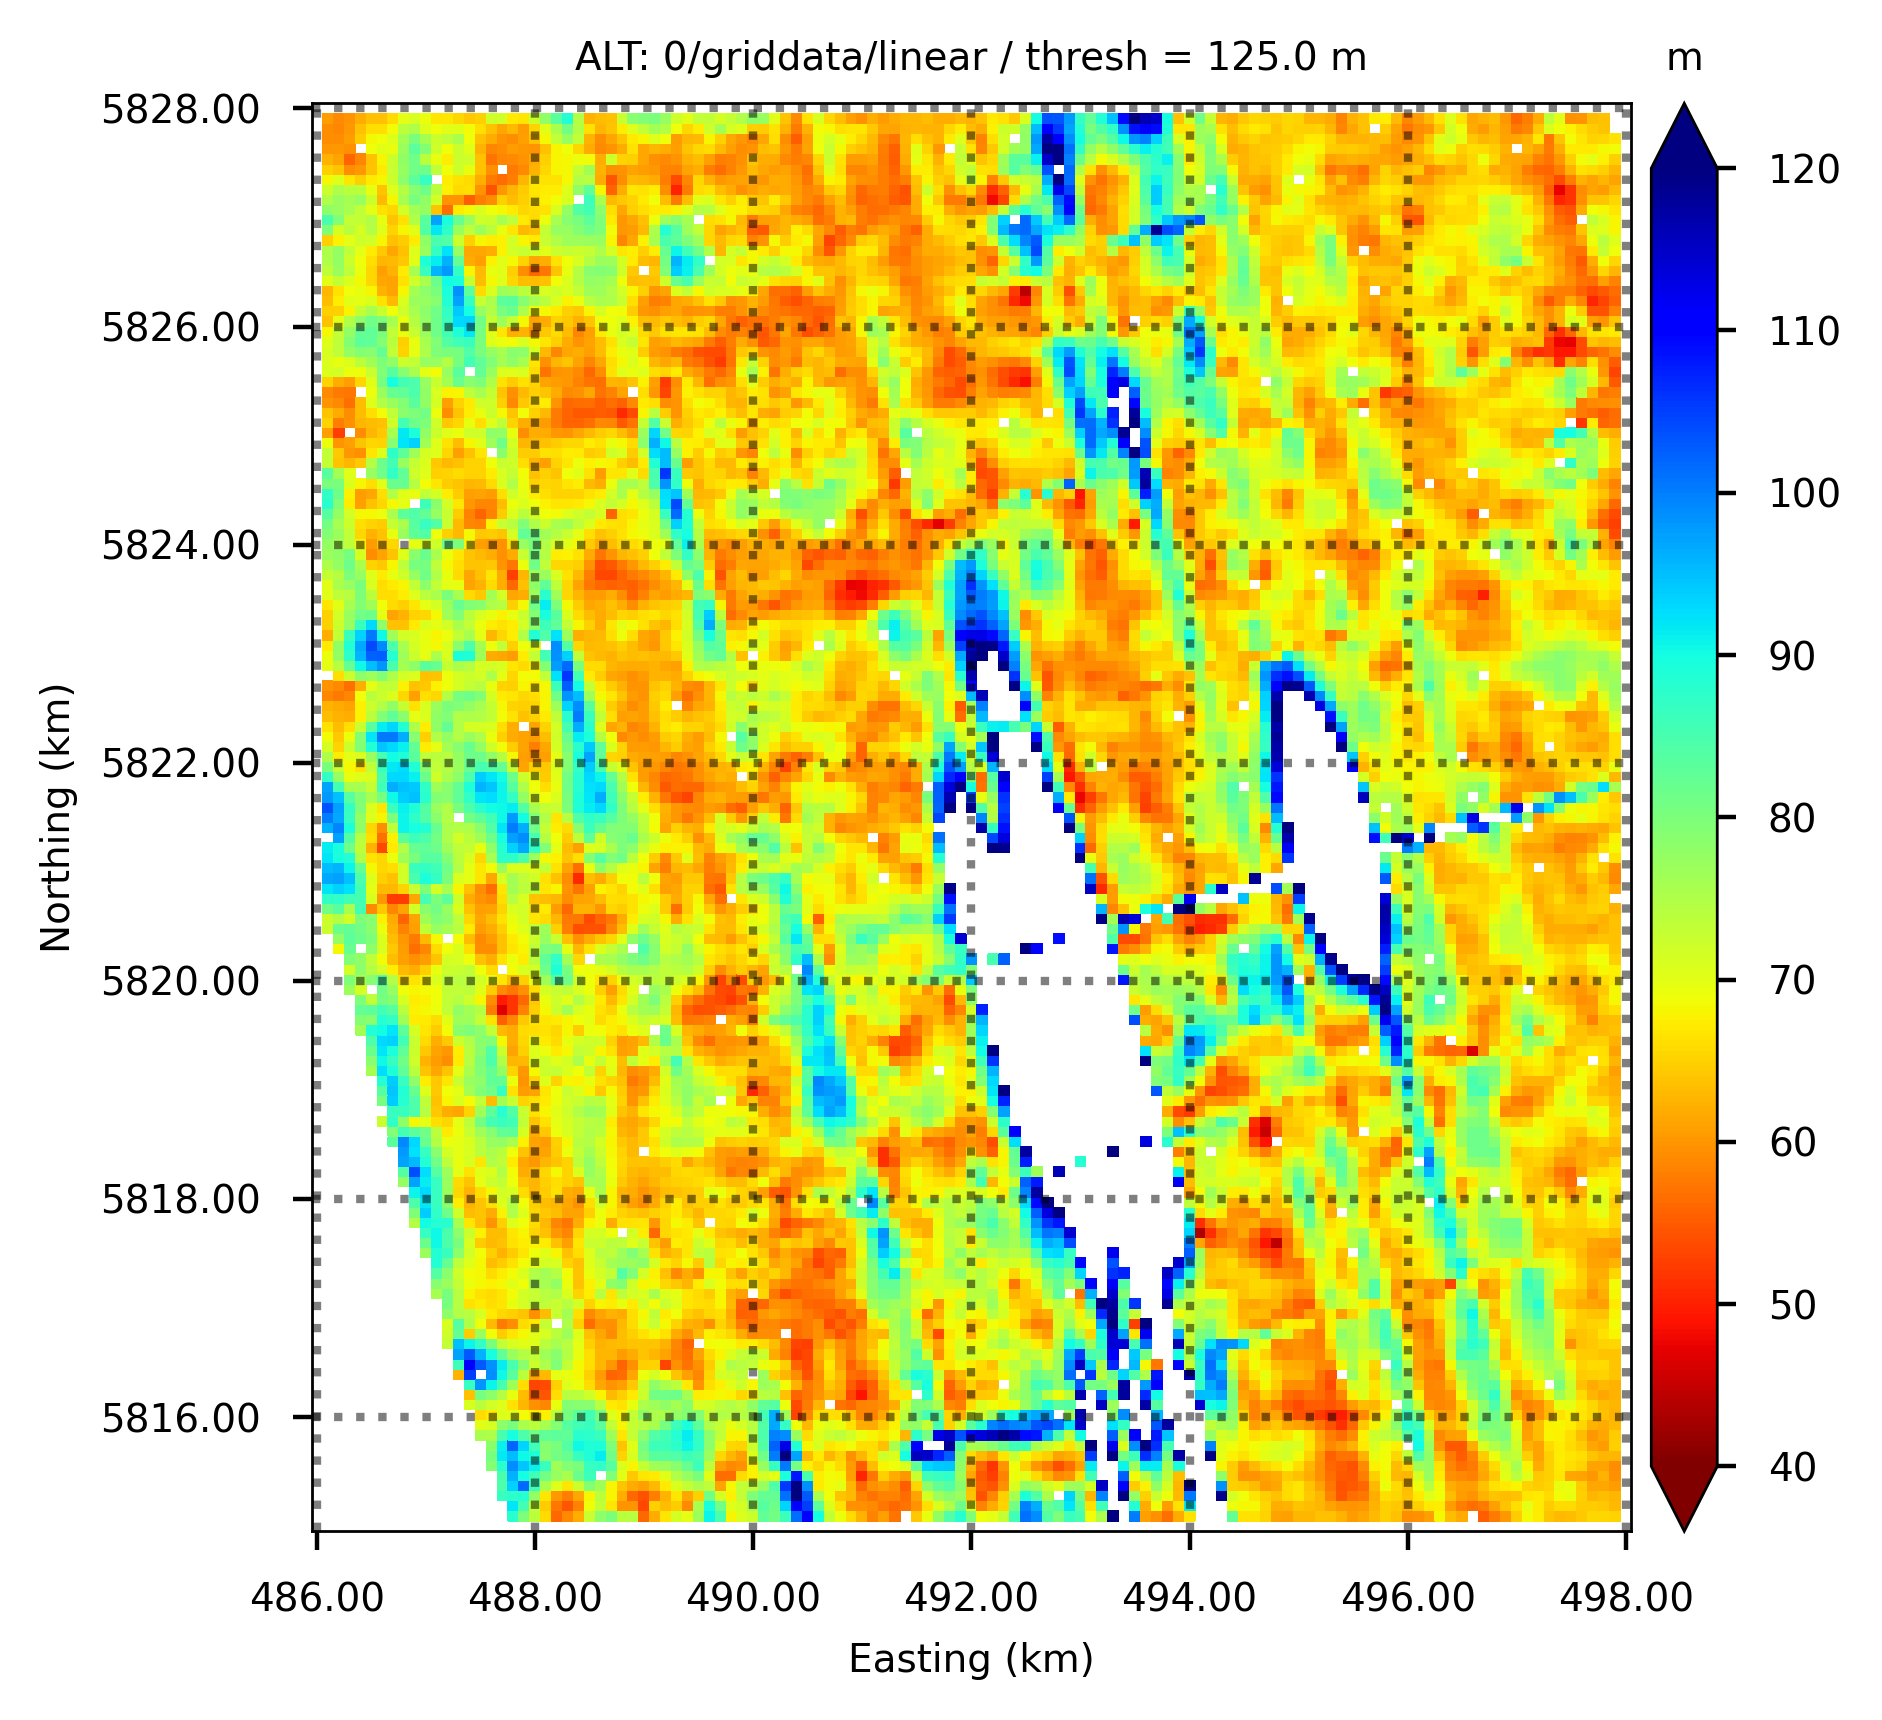

<Figure size 2560x1760 with 0 Axes>

In [31]:
for filein in dat_files:
    start = process_time()
    print("\nData read from: %s" % filein)
    Data, header, _ = aesys.read_aempy(File=filein, System=AEM_system, OutInfo=False)


    E = Data[:,1][::step]*XYFact
    E_min = numpy.amin(E)
    E_max = numpy.amax(E)
    N = Data[:,2][::step]*XYFact
    N_min = numpy.amin(N)
    N_max = numpy.amax(N)
    Z = Data[:,5][::step]

    if ("image" in ImageType.lower()) or ("contour"in ImageType.lower()):
        xi= numpy.linspace(E_min,E_max,numIndexes[0])
        yi= numpy.linspace(N_min,N_max,numIndexes[1])
        dx = numpy.around(numpy.diff(xi)[0]/XYFact, decimals=0)
        dy = numpy.around(numpy.diff(yi)[0]/XYFact, decimals=0)
        print("Interpolation mesh, dx = "+ str(dx)+" m, dy ="+ str(dy)+" m")
        XI, YI = numpy.meshgrid(xi, yi, indexing="ij")
        Pnts = numpy.stack([ E.ravel(),  N.ravel()], -1)
        Mesh = numpy.stack([XI.ravel(), YI.ravel()], -1)

        if MaskDist:
            D_tree=scipy.spatial.KDTree(Pnts, leafsize=10,
                                        compact_nodes=True,
                                        copy_data=True,
                                        balanced_tree=True,
                                        boxsize=None)
            mindist, _ = D_tree.query(Mesh, k=1)
            blankdist = mindist>=DistMask


        if MaskPoly:
            XIF = XI.flatten().reshape(-1,1)/XYFact
            YIF = YI.flatten().reshape(-1,1)/XYFact
            blankpoly=[]
            for ipnt in numpy.arange(numpy.size(XIF)):
                outside = not util.point_inside_polygon(XIF[ipnt], YIF[ipnt],
                                                        Polygon)
                blankpoly.append(outside)


    pdf_list = []
    # for Comp in CompList:
    for nc in numpy.arange(len(CompList)):

        Comp = CompList[nc][0]

        comp = CompDict[Comp][0]
        indx = CompLabl.index(Comp)

        if "scatter"in ImageType.lower():
            titl = CompLabl[indx]+CompDict[Comp][2]+": "+str(DataTrans)
        else:
            titl = CompLabl[indx]+CompDict[Comp][2]+": "+str(DataTrans)+"/"+InterpMethod[0]+"/"+InterpMethod[1]

        print("Plotting component "+titl)
        D = Data[:,comp][::step]

        D_min = numpy.amin(D)
        D_max = numpy.amax(D)
        print("Data, read   min="+str( D_min)+"   max="+str( D_max))

        if ("Z" in Comp) or ("H" in Comp):
            Unit = "ppm"
            if DataTrans ==1:
                Unit = "-"
                D = numpy.log10(D)
            if DataTrans ==2:
                Unit = "-"
                if not numpy.isfinite(S):
                   S = inverse.get_S(D)
                D= numpy.arcsinh(D/S)
                print("Scaling Value S for arcsinh:"+str(S))

        if ("P" in Comp) or ("Q" in Comp):
            Unit = "ppm"
            if DataTrans ==1:
                Unit = "-"
                D = numpy.log10(D)
            if DataTrans ==2:
                Unit = "-"
                if not numpy.isfinite(S):
                    S = inverse.get_S(D)
                D= numpy.arcsinh(D/S)
                print("Scaling Value S for arcsinh:"+str(S))

        if ("PL" in Comp):
            Unit = "(-)"
            PLMthresh= CompList[nc][2]
            titl = titl+" / thresh = "+str(PLMthresh)

        if ("A" in Comp):
            Unit = "m"
            ALTthresh= CompList[nc][2]
            titl = titl+" / thresh = "+str(ALTthresh)+" m"

        if ("R" in Comp):
            Unit = "Ohm.m"


        fig, ax = matplotlib.pyplot.subplots()
        fig.set_figwidth(FigWidth)


        if ("scatter" in ImageType.lower()):
            print("Scatter Plot")

            if Pixelsize:
                Markersize =(72./fig.dpi)

            if ("PL" in Comp):
                D[D<=PLMthresh]=numpy.nan
            if ("A" in Comp):
                D[D>=ALTthresh]=numpy.nan

            if MaskNeg:
                D[D<=0.]= numpy.nan

            if Pixelsize:
                im = matplotlib.pyplot.scatter(E, N, color='black', marker='.', lw=0, s=(sfac*72./fig.dpi)**2)
            else:
                im = matplotlib.pyplot.scatter(E, N, c=D, s=Markersize**2, cmap=cmp)

            # ax = matplotlib.pyplot.gca()
            ax.set_aspect("equal")
            ax.xaxis.set_major_formatter(xformatter)
            ax.set_xlabel("Easting "+XYUnits, size=Fontsizes[1])
            ax.yaxis.set_major_formatter(yformatter)
            ax.set_ylabel("Northing "+XYUnits, size=Fontsizes[1])

            ax.tick_params(axis="x", labelsize=Fontsizes[1]-2, labelrotation=0.)#-45)
            ax.tick_params(axis="y", labelsize=Fontsizes[1]-2, labelrotation=0.)#-45)
            ax.grid(which="major", axis="both", visible=True,linewidth= Linewidths[0],linestyle="--")
            ax.set_title(AEM_system.upper()+": "+ Comp)

            divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.02)
            cb = matplotlib.pyplot.colorbar(im, cax=cax, extend="both")
            cb.ax.tick_params(labelsize=Fontsizes[1])
            cb.ax.set_title(Unit, fontsize=Fontsizes[1])


        if ("image" in ImageType.lower()) or ("contour"in ImageType.lower()):
            Dats = D.flatten()
            if "grid" in InterpMethod[0].lower():
                DI = scipy.interpolate.griddata(Pnts, Dats, Mesh,
                                                method=InterpMethod[1].lower())
                DI = numpy.reshape(DI,(len(xi), len(yi)))

            elif "rbf" in InterpMethod[0].lower():
                # RBF = scipy.interpolate.Rbf(E, N, D,
                #                             function=InterpMethod[1].lower(), smooth=InterpMethod[2])
                # DI  = RBF(XI, YI)
                Pnts = numpy.stack([ E.ravel(),  N.ravel()], -1)
                Mesh = numpy.stack([XI.ravel(), YI.ravel()], -1)
                Dats = D.ravel()
                RBF = scipy.interpolate.RBFInterpolator(
                            Pnts, Dats,
                            kernel=InterpMethod[1], smoothing=InterpMethod[2])
                DI = RBF(Mesh)
                DI = numpy.reshape(DI,(len(xi), len(yi)))


            elif "krig" in InterpMethod[0].lower():
                error("Kriging estimation not yet implemented! Exit.")


            if ("PL" in Comp):
                DI[DI<=PLMthresh]=numpy.nan
            if ("A" in Comp):
                DI[DI>=ALTthresh]=numpy.nan

            if MaskNeg:
                DI[DI<=0.]= numpy.nan

            if MaskPoly:
                DIF = DI.flatten().reshape(-1,1)
                DIF[blankpoly] = numpy.nan
                DI = numpy.reshape(DIF,(len(xi), len(yi)))

            if MaskDist:
                DIF = DI.flatten().reshape(-1,1)
                DIF[blankdist] = numpy.nan
                DI = numpy.reshape(DIF,(len(xi), len(yi)))


            D_min = numpy.nanmin(DI)
            D_max = numpy.nanmax(DI)
            print("Data, interpolated   min="+str( D_min)+"   max="+str( D_max))


            if len(CompList[nc][1])==0:
                if ("image" in ImageType.lower()):
                    im = ax.pcolor(XI, YI, DI, cmap=cmp)
                if ("contour" in ImageType.lower()):
                    im = ax.contourf(XI, YI, DI, cmap=cmp, levels=Levels)
            else:
                if ("image" in ImageType.lower()):
                    valmin, valmax, _ = CompList[nc][1]

                    im = ax.pcolor(XI, YI, DI,
                                   cmap=cmp,
                                   vmin=valmin, vmax=valmax)
                if ("contour" in ImageType.lower()):
                    valmin, valmax, valdel = CompList[nc][1]
                    levels = numpy.arange(valmin, valmax+valdel, valdel)
                    im = ax.contourf(XI, YI, DI,
                                     cmap=cmp,
                                     vmin=valmin, vmax=valmax,
                                     levels=levels)

            ax.set_aspect("equal")
            ax.xaxis.set_major_formatter(xformatter)
            ax.set_xlabel("Easting "+XYUnits, size=Fontsizes[1])
            ax.yaxis.set_major_formatter(yformatter)
            ax.set_ylabel("Northing "+XYUnits, size=Fontsizes[1])

            ax.set_title(titl,fontsize=Fontsize)

            ax.grid(color="k", alpha=0.5, linestyle="dotted", linewidth=1.5)
            ax.tick_params(labelsize=Labelsize)


            divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)

            cb = matplotlib.pyplot.colorbar(im, cax=cax, extend="both")
            cb.ax.tick_params(labelsize=Fontsizes[1])
            cb.ax.set_title(Unit, fontsize=Fontsizes[1])


        """
        CoLORBARS:
        extend{'neither', 'both', 'min', 'max'}

            Make pointed end(s) for out-of-range values (unless 'neither'). These are set for a given colormap using the colormap set_under and set_over methods.
        extendfrac{None, 'auto', length, lengths}

            If set to None, both the minimum and maximum triangular colorbar extensions will have a length of 5% of the interior colorbar length (this is the default setting).

            If set to 'auto', makes the triangular colorbar extensions the same lengths as the interior boxes (when spacing is set to 'uniform') or the same lengths as the respective adjacent interior boxes (when spacing is set to 'proportional').

            If a scalar, indicates the length of both the minimum and maximum triangular colorbar extensions as a fraction of the interior colorbar length. A two-element sequence of fractions may also be given, indicating the lengths of the minimum and maximum colorbar extensions respectively as a fraction of the interior colorbar length.
        extendrectbool

            If False the minimum and maximum colorbar extensions will be triangular (the default). If True the extensions will be rectangular.
        """


        if "scatter" in ImageType.lower():
            plotfile = PlotDir+PlotName+"_"+AEM_system\
                +"_"+ImageType\
                +"_"+ Comp
        else:
            plotfile = PlotDir+PlotName+"_"+AEM_system\
                +"_"+ImageType\
                +"_"+ Comp\
            +"_"+InterpMethod[0].lower()\
            +"_"+InterpMethod[1].lower()


        for F in PlotFmt:

            print("Plot written to "+plotfile+F)
            matplotlib.pyplot.savefig(plotfile+F,
                                      dpi=600,
                                      bbox_inches="tight",
                                      backend= "cairo",
                                      transparent=True)


        if PDFCatalog:
            pdf_list.append(plotfile+".pdf")

        matplotlib.pyplot.show()
        matplotlib.pyplot.clf()

In [32]:
if PDFCatalog:
    viz.make_pdf_catalog(PDFList=pdf_list, FileName=PDFCName)


10 files collected to MUN_3s_Catalog_Images.pdf
